## Scrub

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

df = pd.read_csv('../dsc-phase-2-project/data/kc_house_data.csv', thousands=r',')
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014 221900.00         3       1.00         1180   
1  6414100192   12/9/2014 538000.00         3       2.25         2570   
2  5631500400   2/25/2015 180000.00         2       1.00          770   
3  2487200875   12/9/2014 604000.00         4       3.00         1960   
4  1954400510   2/18/2015 510000.00         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650    1.00         nan  0.00          3      7        1180   
1      7242    2.00        0.00  0.00          3      7        2170   
2     10000    1.00        0.00  0.00          3      6         770   
3      5000    1.00        0.00  0.00          5      7        1050   
4      8080    1.00        0.00  0.00          3      8        1680   

  sqft_basement  yr_built  yr_renovated  zipcode   lat    long  sqft_living15  \
0           0.0      1955          0.00    98178 47.51 -122.26           1340   
1         400.0      1951       1991.00    98125 47.72 -122.32           1690   
2           0.0      1933           nan    98028 47.74 -122.23           2720   
3         910.0      1965          0.00    98136 47.52 -122.39           1360   
4           0.0      1987          0.00    98074 47.62 -122.05           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503

In [2]:
# https://re-thought.com/how-to-suppress-scientific-notation-in-pandas/
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Date should be a datetime object
# Sftft_basement contains strings
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
df['date'] = pd.to_datetime(df['date'])

In [4]:
df.describe()
# id isn't truly an int
# price has a very large SD and outliers
# it seems that there may be a couple of outlier values driving up the max across columns
# floors, waterfront, view, condition, and grade are ordinal categorical values
# zipcode, lat, long isn't truly an int
# waterfront may be a binary variable
# year renovated contains null values, probably due to homes that have not yet been renovated

id      price  bedrooms  bathrooms  sqft_living   sqft_lot  \
count      21597.00   21597.00  21597.00   21597.00     21597.00   21597.00   
mean  4580474287.77  540296.57      3.37       2.12      2080.32   15099.41   
std   2876735715.75  367368.14      0.93       0.77       918.11   41412.64   
min      1000102.00   78000.00      1.00       0.50       370.00     520.00   
25%   2123049175.00  322000.00      3.00       1.75      1430.00    5040.00   
50%   3904930410.00  450000.00      3.00       2.25      1910.00    7618.00   
75%   7308900490.00  645000.00      4.00       2.50      2550.00   10685.00   
max   9900000190.00 7700000.00     33.00       8.00     13540.00 1651359.00   

        floors  waterfront     view  condition    grade  sqft_above  yr_built  \
count 21597.00    19221.00 21534.00   21597.00 21597.00    21597.00  21597.00   
mean      1.49        0.01     0.23       3.41     7.66     1788.60   1971.00   
std       0.54        0.09     0.77       0.65     1.17      827.76     29.38   
min       1.00        0.00     0.00       1.00     3.00      370.00   1900.00   
25%       1.00        0.00     0.00       3.00     7.00     1190.00   1951.00   
50%       1.50        0.00     0.00       3.00     7.00     1560.00   1975.00   
75%       2.00        0.00     0.00       4.00     8.00     2210.00   1997.00   
max       3.50        1.00     4.00       5.00    13.00     9410.00   2015.00   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
count      17755.00 21597.00 21597.00 21597.00       21597.00    21597.00  
mean          83.64 98077.95    47.56  -122.21        1986.62    12758.28  
std          399.95    53.51     0.14     0.14         685.23    27274.44  
min            0.00 98001.00    47.16  -122.52         399.00      651.00  
25%            0.00 98033.00    47.47  -122.33        1490.00     5100.00  
50%            0.00 98065.00    47.57  -122.23        1840.00     7620.00  
75%            0.00 98118.00    47.68  -122.12        2360.00    10083.00  
max         2015.00 98199.00    47.78  -121.31        6210.00   871200.00

Text(0.5, 0, '% of Unique Values')

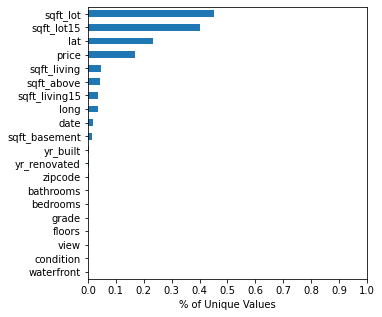

In [7]:
# Show the proportion of unique values per column

# Bathrooms, bedrooms, grade, floors, view, condition, and waterfront to have a very small number 
# of unique values. They may be categorical/ordinal
# Zipcode, year renovated, year built, basement, sqft living, sqft above, sqft living15 are all below 10%

nu_dict = dict(df.nunique())
val_list = list(nu_dict.values())

percent = []
for col, val in zip(df.columns, val_list):
    percent.append(val/len(df[col]))  
unique_per_column = pd.Series(data=percent, index=df.columns)
unique_per_column.drop('id').sort_values(ascending=True).plot(kind='barh', figsize=(5,5), xticks=np.linspace(0,1,11))
plt.xlabel('% of Unique Values')

In [8]:
low_nunique = []
for k,v in nu_dict.items():
    if v < 15:
        low_nunique.append(k)
    else:
        pass
low_nunique

['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

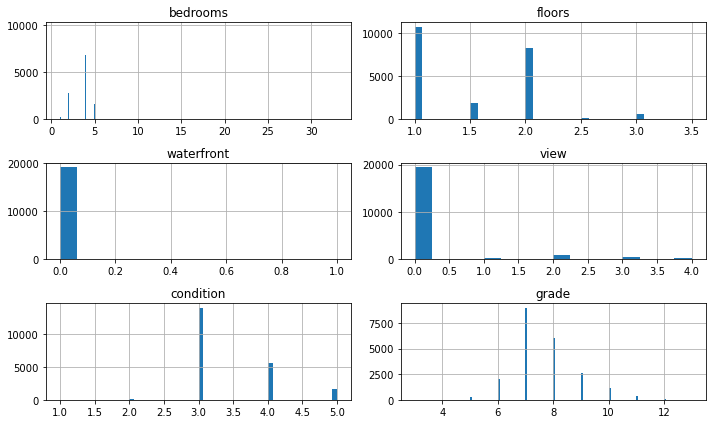

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# It appears all but waterfront are categorical variables with ordinal values
# Waterfront is the only binary variable


df[low_nunique].hist(figsize=(10,6), bins='auto');
# fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12,8))
# for ax, col in zip(axes.flatten(), df[low_nunique]):    
#     ax.hist(x=df[low_nunique])
plt.tight_layout()

<AxesSubplot:>

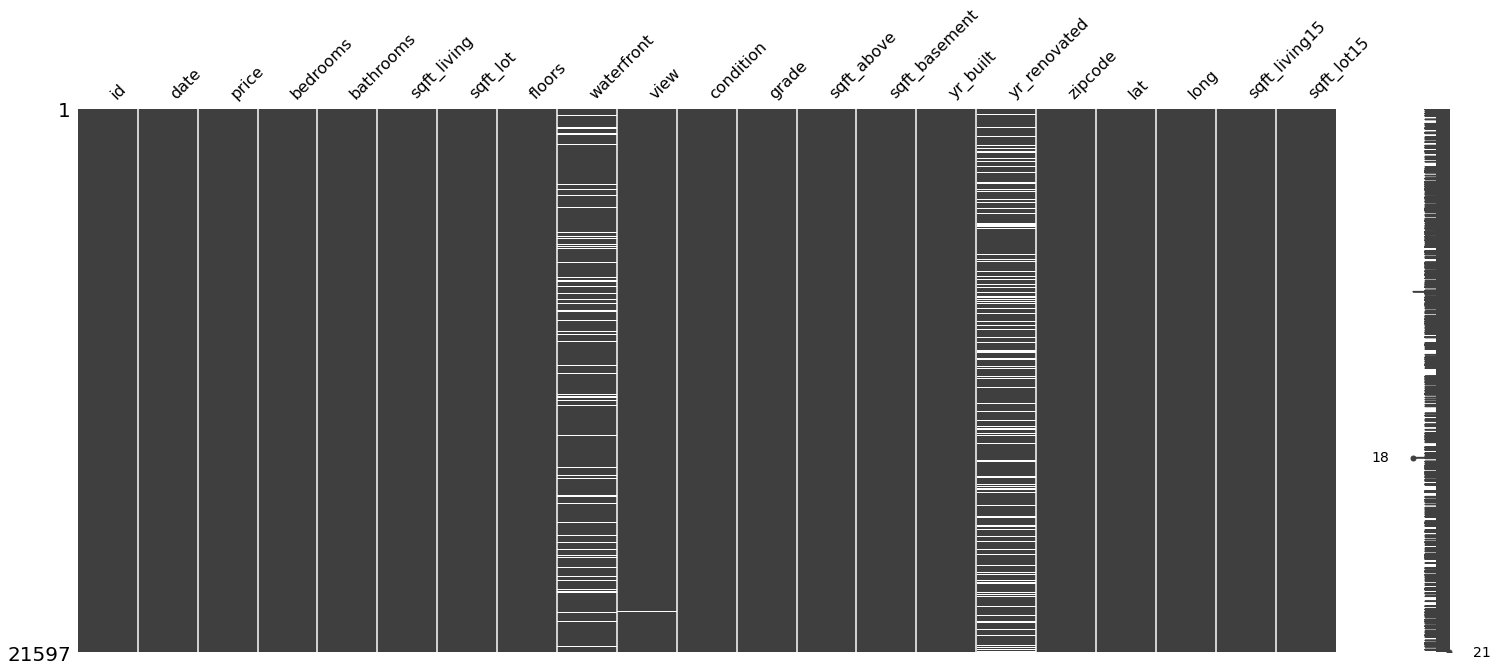

In [10]:
# Start checking for null values

# Waterfront, view, and yr_renovated are the only columns with missing data

import missingno
missingno.matrix(df)

In [11]:
null = df.isna().sum()
null[null>1]

waterfront      2376
view              63
yr_renovated    3842
dtype: int64

In [12]:
# No recognizable pattern for why certain view values are missing

print(df['view'].value_counts(1))
df[df['view'].isnull()]

0.00   0.90
2.00   0.04
3.00   0.02
1.00   0.02
4.00   0.01
Name: view, dtype: float64


id        date      price  bedrooms  bathrooms  sqft_living  \
7      2008000270   1/15/2015  291850.00         3       1.50         1060   
114    8961960160  10/28/2014  480000.00         4       2.50         3230   
129    7853210060    4/6/2015  430000.00         4       2.50         2070   
205    3456000310    8/4/2014  840000.00         4       1.75         2480   
487    1895000260   7/21/2014  207950.00         2       2.00          890   
...           ...         ...        ...       ...        ...          ...   
19989   148000475   5/28/2014 1400000.00         4       3.25         4700   
20148   291310170    8/4/2014  384500.00         3       2.50         1600   
20380  1196003740   9/24/2014  734000.00         5       4.25         4110   
21057  3448900290   8/28/2014  636230.00         4       2.50         2840   
21589  3448900210  10/14/2014  610685.00         4       2.50         2520   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
7          9711    1.00        0.00   nan          3      7        1060   
114       16171    2.00        0.00   nan          3      9        2520   
129        4310    2.00        0.00   nan          3      7        2070   
205       11010    1.00        0.00   nan          4      9        1630   
487        5000    1.00        0.00   nan          3      6         890   
...         ...     ...         ...   ...        ...    ...         ...   
19989      9160    1.00        0.00   nan          3     11        2520   
20148      2610    2.00        0.00   nan          3      8        1600   
20380     42755    2.00        0.00   nan          3     10        2970   
21057      6284    2.00        0.00   nan          3      9        2840   
21589      6023    2.00        0.00   nan          3      9        2520   

      sqft_basement  yr_built  yr_renovated  zipcode   lat    long  \
7               0.0      1963          0.00    98198 47.41 -122.31   
114           710.0      2001          0.00    98001 47.32 -122.25   
129             0.0      2004          0.00    98065 47.53 -121.85   
205           850.0      1966           nan    98040 47.54 -122.22   
487             0.0      1917          0.00    98118 47.52 -122.26   
...             ...       ...           ...      ...   ...     ...   
19989        2180.0      2005          0.00    98116 47.57 -122.41   
20148           0.0      2005           nan    98027 47.53 -122.07   
20380        1140.0      2000           nan    98023 47.34 -122.34   
21057           0.0      2013          0.00    98056 47.51 -122.17   
21589           0.0      2014          0.00    98056 47.51 -122.17   

       sqft_living15  sqft_lot15  
7               1650        9711  
114             2640        8517  
129             1970        3748  
205             2770       10744  
487             1860        5000  
...              ...         ...  
19989           2240        8700  
20148           1445        1288  
20380           2730       12750  
21057           2790        7168  
21589           2520        6023  

[63 rows x 21 columns]

In [13]:
print(df['yr_renovated'].value_counts())
df[df['yr_renovated'].isnull()]

0.00       17011
2014.00       73
2003.00       31
2013.00       31
2007.00       30
           ...  
1946.00        1
1959.00        1
1971.00        1
1951.00        1
1954.00        1
Name: yr_renovated, Length: 70, dtype: int64


id        date      price  bedrooms  bathrooms  sqft_living  \
2      5631500400   2/25/2015  180000.00         2       1.00          770   
12      114101516   5/28/2014  310000.00         3       1.00         1430   
23     8091400200   5/16/2014  252700.00         2       1.50         1070   
26     1794500383   6/26/2014  937000.00         3       1.75         2450   
28     5101402488   6/24/2014  438000.00         3       1.75         1520   
...           ...         ...        ...       ...        ...          ...   
21576  1931300412   4/16/2015  475000.00         3       2.25         1190   
21577  8672200110   3/17/2015 1090000.00         5       3.75         4170   
21579  1972201967  10/31/2014  520000.00         2       2.25         1530   
21581   191100405   4/21/2015 1580000.00         4       3.25         3410   
21583  7202300110   9/15/2014  810000.00         4       3.00         3990   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
2         10000    1.00        0.00  0.00          3      6         770   
12        19901    1.50        0.00  0.00          4      7        1430   
23         9643    1.00         nan  0.00          3      7        1070   
26         2691    2.00        0.00  0.00          3      8        1750   
28         6380    1.00        0.00  0.00          3      7         790   
...         ...     ...         ...   ...        ...    ...         ...   
21576      1200    3.00        0.00  0.00          3      8        1190   
21577      8142    2.00        0.00  2.00          3     10        4170   
21579       981    3.00        0.00  0.00          3      8        1480   
21581     10125    2.00        0.00  0.00          3     10        3410   
21583      7838    2.00        0.00  0.00          3      9        3990   

      sqft_basement  yr_built  yr_renovated  zipcode   lat    long  \
2               0.0      1933           nan    98028 47.74 -122.23   
12              0.0      1927           nan    98028 47.76 -122.23   
23              0.0      1985           nan    98030 47.35 -122.17   
26            700.0      1915           nan    98119 47.64 -122.36   
28            730.0      1948           nan    98115 47.70 -122.30   
...             ...       ...           ...      ...   ...     ...   
21576           0.0      2008           nan    98103 47.65 -122.35   
21577           0.0      2006           nan    98056 47.54 -122.18   
21579          50.0      2006           nan    98103 47.65 -122.35   
21581             ?      2007           nan    98040 47.57 -122.22   
21583           0.0      2003           nan    98053 47.69 -122.05   

       sqft_living15  sqft_lot15  
2               2720        8062  
12              1780       12697  
23              1220        8386  
26              1760        3573  
28              1520        6235  
...              ...         ...  
21576           1180        1224  
21577           3030        7980  
21579           1530        1282  
21581           2290       10125  
21583           3370        6814  

[3842 rows x 21 columns]

In [14]:
# Handle waterfront null values
# Check if it can be explained by location

print('Has view of water (Latitude)')
print(df[df['waterfront']==1.0]['lat'].describe())
print('------------------------------------------')
print('Does not have view of water (Latitude)')
print(df[df['waterfront']==0.0]['lat'].describe())
print('------------------------------------------')
print('Has view of water (Price)')
print(df[df['waterfront']==1.0]['price'].describe())
print('------------------------------------------')
print('Does not have view of water')
print(df[df['waterfront']==0.0]['price'].describe())

Has view of water (Latitude)
count   146.00
mean     47.54
std       0.11
min      47.33
25%      47.45
50%      47.55
75%      47.61
max      47.77
Name: lat, dtype: float64
------------------------------------------
Does not have view of water (Latitude)
count   19075.00
mean       47.56
std         0.14
min        47.16
25%        47.47
50%        47.57
75%        47.68
max        47.78
Name: lat, dtype: float64
------------------------------------------
Has view of water (Price)
count       146.00
mean    1717214.73
std     1145384.86
min      285000.00
25%      827500.00
50%     1510000.00
75%     2282500.00
max     7060000.00
Name: price, dtype: float64
------------------------------------------
Does not have view of water
count     19075.00
mean     532641.99
std      344959.18
min       78000.00
25%      320000.00
50%      450000.00
75%      638600.00
max     7700000.00
Name: price, dtype: float64


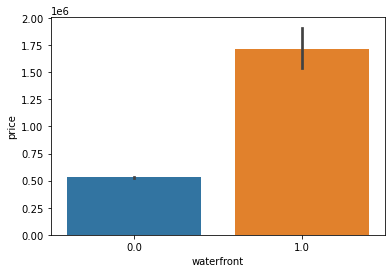

In [15]:
sns.barplot(data=df, x='waterfront', y='price');

In [14]:
mplus_water =len(df[(df['price']>1000000) & df['waterfront']==1.0])
print(f'Number of houses over $1,000,000 with waterfront view:\t{mplus_water}')
mminus_water = len(df[(df['price']<1000000) & df['waterfront']==1.0])
print(f'Number of houses under $1,000,000 with waterfront view:\t{mminus_water}')

Number of houses over $1,000,000 with waterfront view:	96
Number of houses under $1,000,000 with waterfront view:	49


In [15]:
# Going to impute categorical variables the probability that they appear in the dataset
# Begin with waterfront and functionize

# Prior count below:
# 0.00    19075
# 1.00      146
pd.set_option('display.float_format', lambda x: '%.5f' % x)
# Prob of having waterfront view for homes over $1,000,000
print('$1M+ with waterfront');
print(df.loc[df['price']>1000000]['waterfront'].value_counts(1));
print('------------------------------------------')
# Prob of having waterfront view for homes under $1,000,000
print('$1M- with waterfront');
print(df.loc[df['price']<1000000]['waterfront'].value_counts(1))

$1M+ with waterfront
0.00000   0.92666
1.00000   0.07334
Name: waterfront, dtype: float64
------------------------------------------
$1M- with waterfront
0.00000   0.99726
1.00000   0.00274
Name: waterfront, dtype: float64


In [16]:
def impute_cat(df, col):
    '''
    Impute null value with value based on liklihood
    of occurring in the original column
    '''
    val_prob = dict(df[col].value_counts(1))
    prob = list(val_prob.values())
    val = list(val_prob.keys())
    np.random.choice(val, p=prob)
    df[col].fillna(np.random.choice(val, p=prob), inplace=True)
    return df

In [17]:
# Handling question mark as null value

df['sqft_basement'].replace(to_replace='?', value='0.0',inplace=True)
s = df['sqft_basement']
pd.to_numeric(s, downcast='integer')

0          0
1        400
2          0
3        910
4          0
        ... 
21592      0
21593      0
21594      0
21595      0
21596      0
Name: sqft_basement, Length: 21597, dtype: int16

In [18]:
df['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
2360.0        1
1275.0        1
1548.0        1
946.0         1
3500.0        1
Name: sqft_basement, Length: 303, dtype: int64

In [19]:
df['basementyes'] = (df['sqft_basement']!='0.0').map({True:1,
                                                      False: 0})

In [20]:
(df['sqft_basement']=='0.0').sum()

13280

In [21]:
df['basementyes'].value_counts(1)

0   0.61
1   0.39
Name: basementyes, dtype: float64

In [22]:
df_1mplus=df.loc[df['price']>1000000]
df_1mminus=df.loc[df['price']<1000000]

In [23]:
df_1mplus =impute_cat(df_1mplus, 'waterfront')

/Users/ethankunin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [24]:
df_1mminus['waterfront'] =df_1mminus['waterfront'].fillna(0)

<ipython-input-24-d246c886c934>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1mminus['waterfront'] =df_1mminus['waterfront'].fillna(0)


In [25]:
df=pd.concat([df_1mminus, df_1mplus])

In [26]:
# Quality of the view from the home

impute_cat(df, 'view')

id        date      price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.00         3       1.00         1180   
1      6414100192   12/9/2014  538000.00         3       2.25         2570   
2      5631500400   2/25/2015  180000.00         2       1.00          770   
3      2487200875   12/9/2014  604000.00         4       3.00         1960   
4      1954400510   2/18/2015  510000.00         3       2.00         1680   
...           ...         ...        ...       ...        ...          ...   
21574  7430200100   5/14/2014 1220000.00         4       3.50         4910   
21577  8672200110   3/17/2015 1090000.00         5       3.75         4170   
21581   191100405   4/21/2015 1580000.00         4       3.25         3410   
21584   249000205  10/15/2014 1540000.00         5       3.75         4470   
21590  7936000429   3/26/2015 1010000.00         4       3.50         3510   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0          5650    1.00        0.00  0.00          3      7        1180   
1          7242    2.00        0.00  0.00          3      7        2170   
2         10000    1.00        0.00  0.00          3      6         770   
3          5000    1.00        0.00  0.00          5      7        1050   
4          8080    1.00        0.00  0.00          3      8        1680   
...         ...     ...         ...   ...        ...    ...         ...   
21574      9444    1.50        0.00  0.00          3     11        3110   
21577      8142    2.00        0.00  2.00          3     10        4170   
21581     10125    2.00        0.00  0.00          3     10        3410   
21584      8088    2.00        0.00  0.00          3     11        4470   
21590      7200    2.00        0.00  0.00          3      9        2600   

      sqft_basement  yr_built  yr_renovated  zipcode   lat    long  \
0               0.0      1955          0.00    98178 47.51 -122.26   
1             400.0      1951       1991.00    98125 47.72 -122.32   
2               0.0      1933           nan    98028 47.74 -122.23   
3             910.0      1965          0.00    98136 47.52 -122.39   
4               0.0      1987          0.00    98074 47.62 -122.05   
...             ...       ...           ...      ...   ...     ...   
21574        1800.0      2007          0.00    98074 47.65 -122.07   
21577           0.0      2006           nan    98056 47.54 -122.18   
21581           0.0      2007           nan    98040 47.57 -122.22   
21584           0.0      2008          0.00    98004 47.63 -122.20   
21590         910.0      2009          0.00    98136 47.55 -122.40   

       sqft_living15  sqft_lot15  basementyes  
0               1340        5650            0  
1               1690        7639            1  
2               2720        8062            0  
3               1360        5000            1  
4               1800        7503            0  
...              ...         ...          ...  
21574           4560       11063            1  
21577           3030        7980            0  
21581           2290       10125            0  
21584           2780        8964            0  
21590           2050        6200            1  

[21565 rows x 22 columns]

In [27]:
# Consider 0 to mean the home has not been renovated
# Conservativley determined null values should be considered non-renovated homes

df['yr_renovated'].value_counts().sort_values(ascending=False).nlargest(30)

0.00       16988
2014.00       73
2003.00       31
2013.00       31
2007.00       30
2000.00       29
2005.00       29
1990.00       22
2004.00       22
2009.00       21
1989.00       20
2006.00       20
2002.00       17
1998.00       16
1984.00       16
2010.00       15
1983.00       15
2001.00       15
1999.00       15
2008.00       15
1991.00       15
2015.00       14
1985.00       14
1986.00       14
1987.00       14
1994.00       14
1992.00       13
1993.00       12
1997.00       12
1995.00       12
Name: yr_renovated, dtype: int64

In [28]:
# No null values remaining

df['yr_renovated'].fillna(0, inplace=True)

In [29]:
# Check for duplicate values

In [30]:
# I found duplicates in the id column. I interpreted them as changes in the listing because the characterestics
# were the same outside of the date. I decided to keep 'last' because that reflects the most recent listing

pd.set_option('display.max_rows', 500)

df[df.duplicated(subset=['id'],keep=False)]
df=df.drop_duplicates(subset=['id'], keep='last')

In [31]:
# df.sort_values(by='total_rooms', ascending=False)
## 33 bedrooms, believed to be human error because it did not correspond with sqft living
df=df.drop(15856)

## Baseline Model

In [39]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

from scipy import stats
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols

In [40]:
def model_summary(df, X_targets, y, qq=True):
    '''
    Produces OLS Linear Regression summary. True/False toggles if the QQ
    plot is displayed below the summary
    '''
    outcome = y
    x_cols = X_targets
    predictors = '+'.join(x_cols)
    formula = outcome + '~' + predictors
    model = ols(formula=formula, data=df).fit()
    resid1 = model.resid
    
    if qq==True:
        return model.summary(), sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True);
    else:
        return model.summary()

In [44]:

x_baseline = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basementyes']


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  price   R-squared:                       0.700
 Model:                            OLS   Adj. R-squared:                  0.700
 Method:                 Least Squares   F-statistic:                     2772.
 Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
 Time:                        07:58:10   Log-Likelihood:            -2.9152e+05
 No. Observations:               21387   AIC:                         5.831e+05
 Df Residuals:                   21368   BIC:                         5.832e+05
 Df Model:                          18                                         
 Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
 ------------------------------------------------------------------

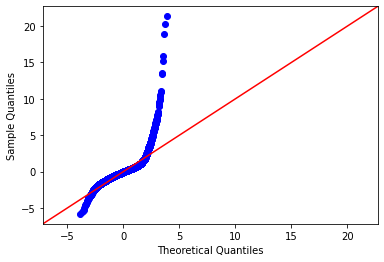

In [45]:
model_summary(df, x_baseline, 'price', True)

In [48]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics


def sked_show(df, X_cols, val='price'):
    '''
    Produces scatter plot showing measue of homoskedacicity
    '''
    lr = LinearRegression()
    lr.fit(df[X_cols], df[val])

    y_hat = lr.predict(df[X_cols])


    y_hat = lr.predict(df[X_cols])
    resid = (df[val] - y_hat)
    fig, ax= plt.subplots(figsize=(5,5))
    ax.scatter(x=y_hat,y=resid, alpha=0.1)
    ax.axhline(0, color='red')
    ax.set_xlabel('Price')
    ax.set_ylabel('Residual')
    return fig,ax

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

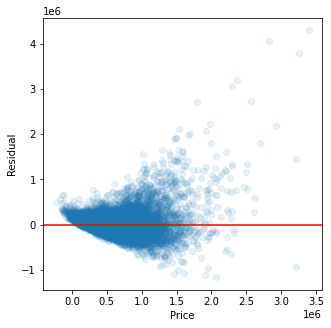

In [49]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

sked_show(df, x_baseline)

### Baseline Model Conclusion
- R^2 is 0.70, adjusted R^2 is 0.70
- QQ Plot deviates significantly around the 3rd quantile
- Floors is not statistically significant
- Basementyes(binary) is not statistically significant
- Values trail off around $1.5 million, begins to become cone shaped
- Model not meat assumption of homoskedacicity

## EDA/New Feature Model

In [51]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basementyes'],
      dtype='object')

price Summary
Median: 450000.0
Mean: 5.412e+05
Max: 7700000.0
Min: 78000.0
Std: 3.674e+05
(<Figure size 576x504 with 3 Axes>, array([<AxesSubplot:title={'center':'price Distribution'}, xlabel='price', ylabel='Density'>,
       <AxesSubplot:xlabel='price'>,
       <AxesSubplot:xlabel='price', ylabel='price'>], dtype=object))
bedrooms Summary
Median: 3.0
Mean: 3.372
Max: 11
Min: 1
Std: 0.9028
(<Figure size 576x504 with 3 Axes>, array([<AxesSubplot:title={'center':'bedrooms Distribution'}, xlabel='bedrooms', ylabel='Density'>,
       <AxesSubplot:xlabel='bedrooms'>,
       <AxesSubplot:xlabel='bedrooms', ylabel='price'>], dtype=object))
bathrooms Summary
Median: 2.25
Mean: 2.118
Max: 8.0
Min: 0.5
Std: 0.7685
(<Figure size 576x504 with 3 Axes>, array([<AxesSubplot:title={'center':'bathrooms Distribution'}, xlabel='bathrooms', ylabel='Density'>,
       <AxesSubplot:xlabel='bathrooms'>,
       <AxesSubplot:xlabel='bathrooms', ylabel='price'>], dtype=object))
sqft_living Summary
Median: 1920.

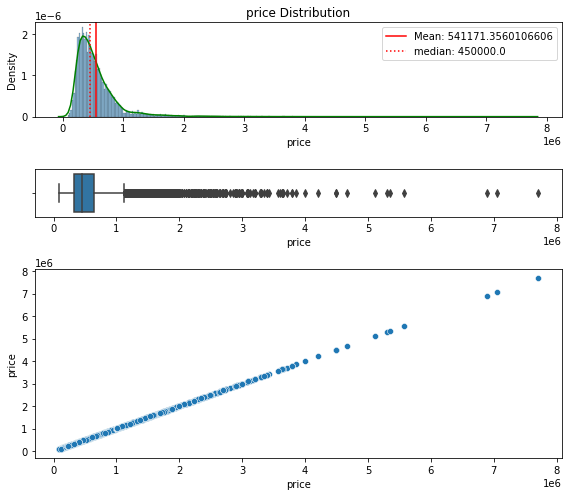

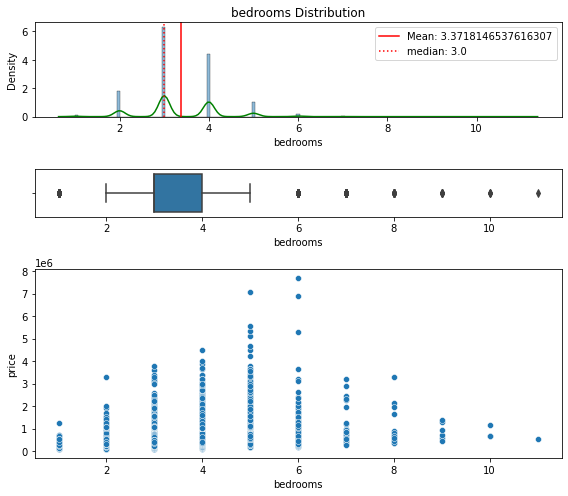

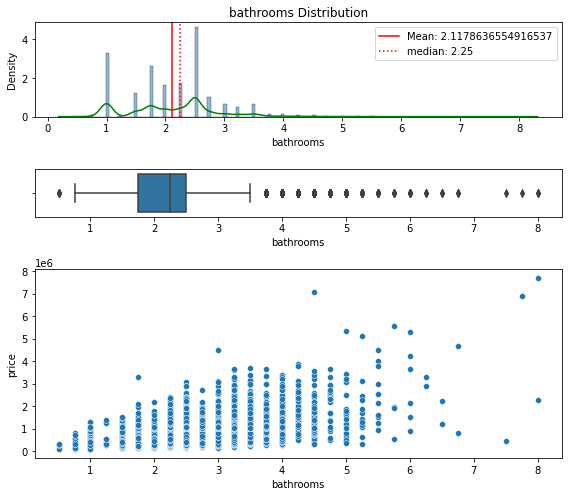

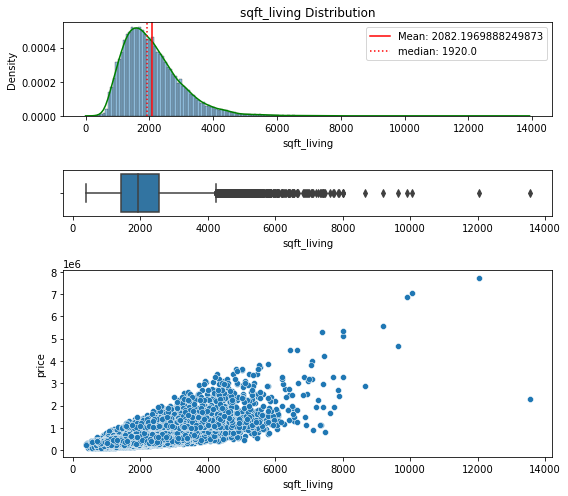

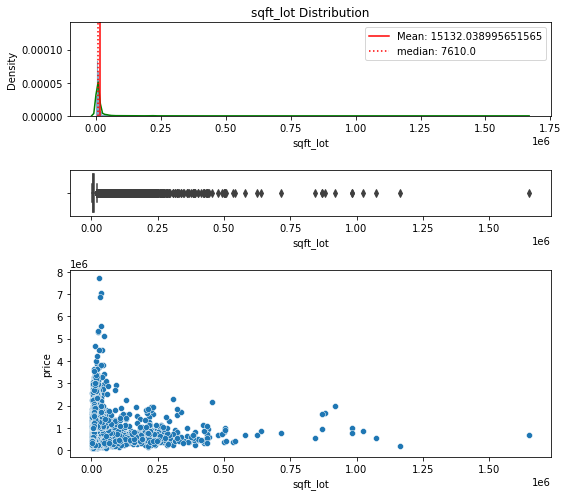

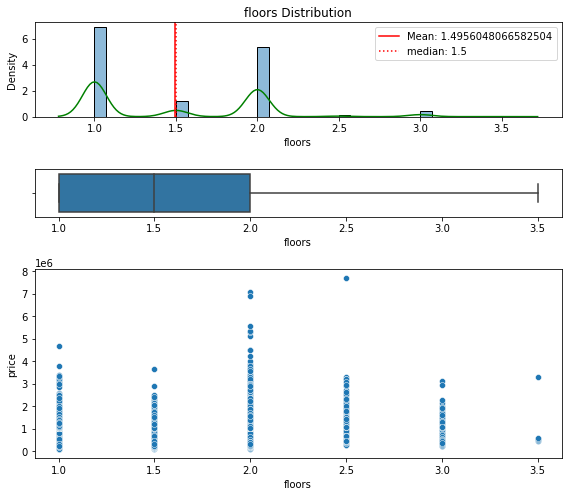

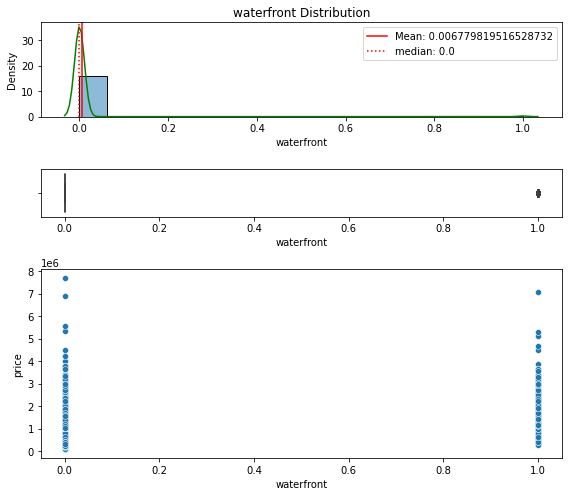

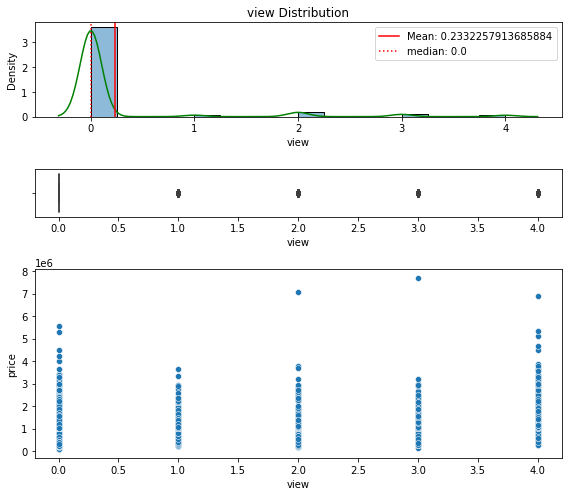

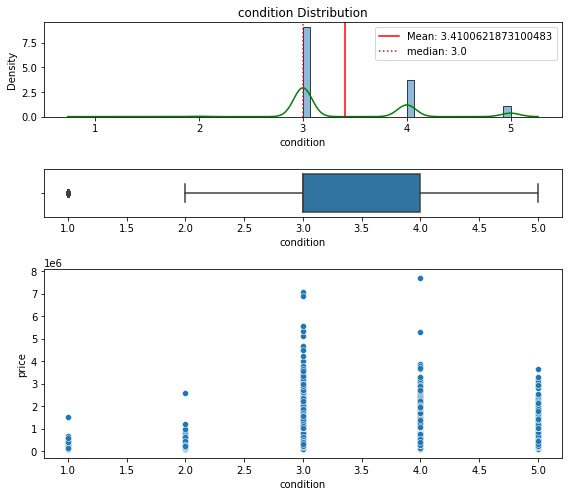

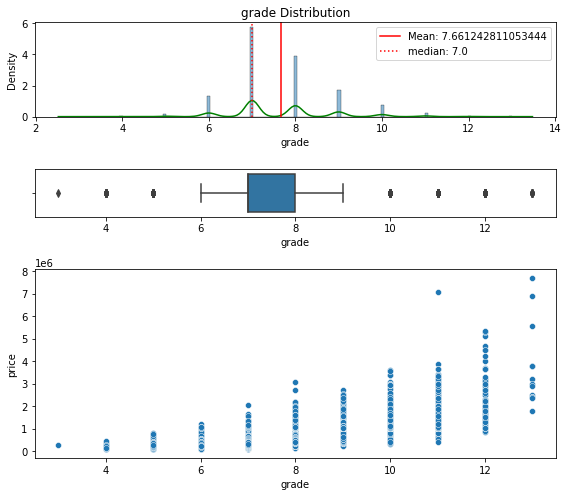

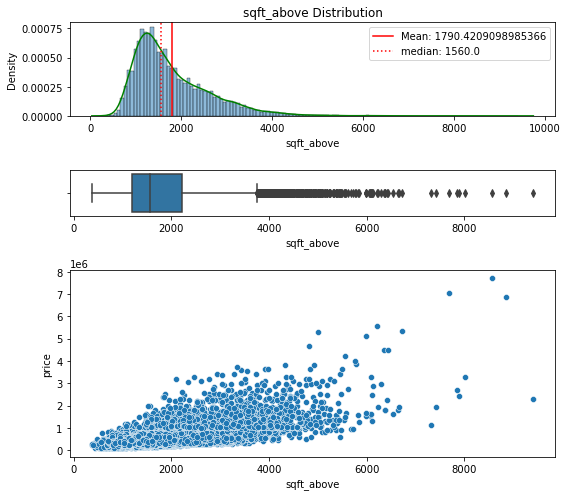

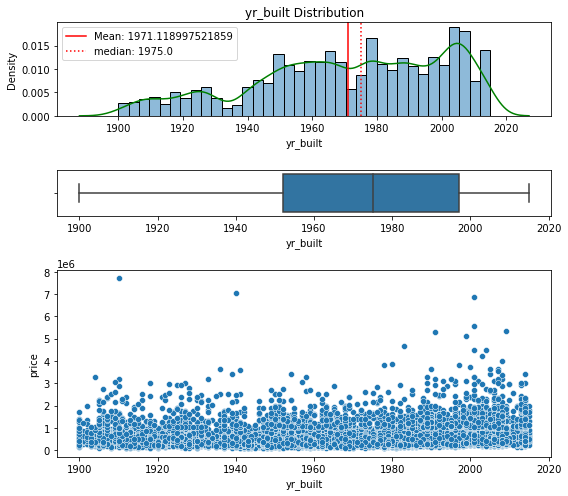

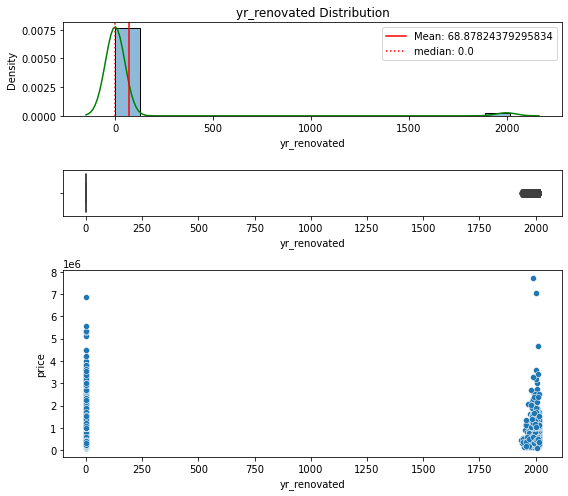

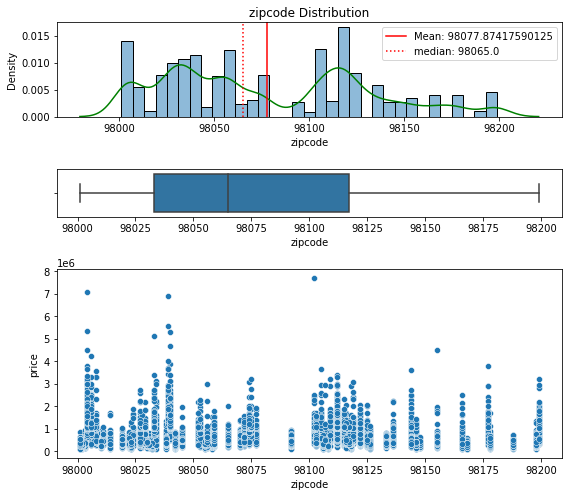

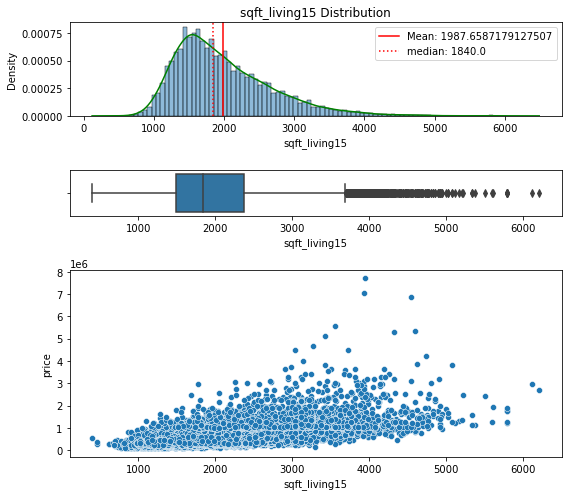

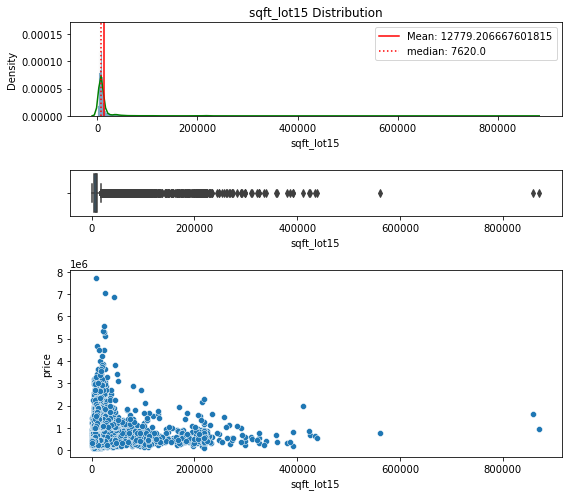

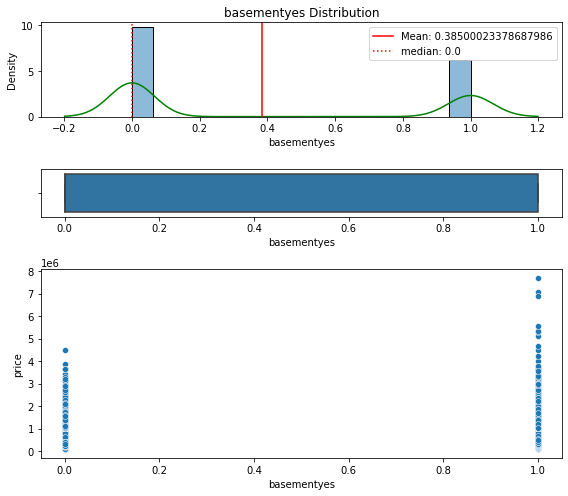

In [56]:
eda_check = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'yr_renovated', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'basementyes']
for col in eda_check:
    print(distr_(df, col))

In [57]:
# Total rooms
# Addition, multiplication would create too large of a SD. ie (2 beds 1 bath=3, 4 beds 1 bath=5)
df['total_rooms'] = df['bedrooms']+df['bathrooms']

In [37]:
# Had erroniously stated 33 bedrooms and 1.5 bathrooms
# df=df.drop(15856)
df.sort_values(by='total_rooms', ascending=False)

id       date         price  bedrooms  bathrooms  sqft_living  \
8537    424049043 2014-08-11  450000.00000         9    7.50000         4050   
13301   627300145 2014-08-14 1150000.00000        10    5.25000         4590   
12764  1225069038 2014-05-05 2280000.00000         7    8.00000        13540   
8748   1773100755 2014-08-21  520000.00000        11    3.00000         3000   
7245   6762700020 2014-10-13 7700000.00000         6    8.00000        12050   
...           ...        ...           ...       ...        ...          ...   
1973   5101404170 2014-11-13  200000.00000         1    0.75000          680   
9811   3598600049 2015-04-24  224000.00000         1    0.75000          840   
8614   6303400395 2015-01-30  325000.00000         1    0.75000          410   
10469  7129304375 2014-07-14  202000.00000         1    0.75000          590   
11662  7987400316 2014-08-14  255000.00000         1    0.50000          880   

       sqft_lot  floors  waterfront    view  condition  grade  sqft_above  \
8537       6504 2.00000     0.00000 0.00000          3      7        4050   
13301     10920 1.00000     0.00000 2.00000          3      9        2500   
12764    307752 3.00000     0.00000 4.00000          3     12        9410   
8748       4960 2.00000     0.00000 0.00000          3      7        2400   
7245      27600 2.50000     0.00000 3.00000          4     13        8570   
...         ...     ...         ...     ...        ...    ...         ...   
1973       9600 1.00000     0.00000 0.00000          3      5         680   
9811       7203 1.50000     0.00000 0.00000          3      6         840   
8614       8636 1.00000     0.00000 0.00000          2      4         410   
10469      5650 1.00000     0.00000 0.00000          3      6         590   
11662      1642 1.00000     0.00000 0.00000          3      6         500   

      sqft_basement  yr_built  yr_renovated  zipcode      lat       long  \
8537            0.0      1996       0.00000    98144 47.59230 -122.30100   
13301        2090.0      2008       0.00000    98004 47.58610 -122.11300   
12764        4130.0      1999       0.00000    98053 47.66750 -121.98600   
8748          600.0      1918    1999.00000    98106 47.55600 -122.36300   
7245         3480.0      1910    1987.00000    98102 47.62980 -122.32300   
...             ...       ...           ...      ...      ...        ...   
1973            0.0      1947       0.00000    98115 47.69640 -122.30600   
9811            0.0      1949       0.00000    98168 47.47560 -122.30100   
8614            0.0      1953       0.00000    98146 47.50770 -122.35700   
10469           0.0      1944       0.00000    98118 47.51810 -122.26700   
11662         380.0      1910       0.00000    98126 47.57320 -122.37200   

       sqft_living15  sqft_lot15  basementyes  total_rooms  
8537            1448        3866            0     16.50000  
13301           2730       10400            1     15.25000  
12764           4850      217800            1     15.00000  
8748            1420        4960            1     14.00000  
7245            3940        8800            1     14.00000  
...              ...         ...          ...          ...  
1973            1580        6624            0      1.75000  
9811            1560        8603            0      1.75000  
8614            1190        8636            0      1.75000  
10469            980        5650            0      1.75000  
11662           1410        2992            1      1.50000  

[21387 rows x 23 columns]

In [54]:
def distr_(df, col):
    fig, ax = plt.subplots(figsize=(8,7), nrows=3, gridspec_kw={'height_ratios': [2,1,4]});
    mean=df[col].mean()
    median=df[col].median()
    max_=df[col].max()
    min_=df[col].min()
    std_=df[col].std()
    sns.histplot(df[col],alpha=0.5,stat='density',ax=ax[0]);
    sns.kdeplot(df[col],color='green',ax=ax[0]);
    ax[0].set_xlabel(col)
    ax[0].set_title(f'{col} Distribution')
    ax[0].axvline(mean, label=f'Mean: {mean}', c='red')
    ax[0].axvline(median, label=f'median: {median}', c='red', linestyle=':')
    ax[0].legend()
    
    sns.boxplot(data=df, x=col, ax=ax[1]);
    
    sns.scatterplot(data=df, x=df[col], y=df['price']);
    
    fig.tight_layout();
    print(f'{col} Summary')
    print(f'Median: {median}')
    print(f'Mean: {mean:.4}')
    print(f'Max: {max_}')
    print(f'Min: {min_}')
    print(f'Std: {std_:.4}')
    return fig, ax;

total_rooms Summary
Median: 5.5
Mean: 5.49
Max: 16.5
Min: 1.5
Std: 1.463


(<Figure size 576x504 with 3 Axes>,
 array([<AxesSubplot:title={'center':'total_rooms Distribution'}, xlabel='total_rooms', ylabel='Density'>,
        <AxesSubplot:xlabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='price'>], dtype=object))

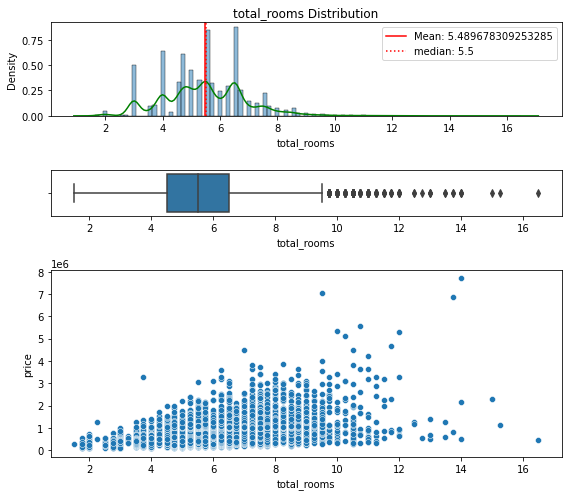

In [58]:
distr_(df, 'total_rooms')

In [59]:
# SQF vs. neighborhood average Living
df['living_vs_neighbor'] = df['sqft_living']/df['sqft_living15']

living_vs_neighbor Summary
Median: 1.0
Mean: 1.054
Max: 6.0
Min: 0.1872791519434629
Std: 0.3203


(<Figure size 576x504 with 3 Axes>,
 array([<AxesSubplot:title={'center':'living_vs_neighbor Distribution'}, xlabel='living_vs_neighbor', ylabel='Density'>,
        <AxesSubplot:xlabel='living_vs_neighbor'>,
        <AxesSubplot:xlabel='living_vs_neighbor', ylabel='price'>],
       dtype=object))

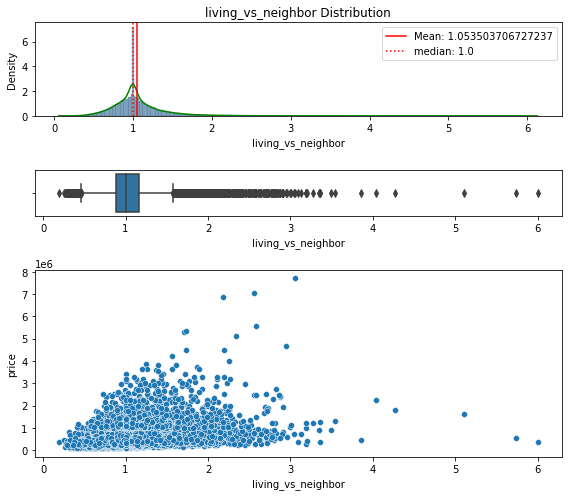

In [60]:
distr_(df, 'living_vs_neighbor')

In [61]:
df['lot_vs_neighbor'] = df['sqft_lot']/df['sqft_lot15']

lot_vs_neighbor Summary
Median: 1.0
Mean: 1.134
Max: 87.52717948717948
Min: 0.054971997700810314
Std: 1.286


(<Figure size 576x504 with 3 Axes>,
 array([<AxesSubplot:title={'center':'lot_vs_neighbor Distribution'}, xlabel='lot_vs_neighbor', ylabel='Density'>,
        <AxesSubplot:xlabel='lot_vs_neighbor'>,
        <AxesSubplot:xlabel='lot_vs_neighbor', ylabel='price'>],
       dtype=object))

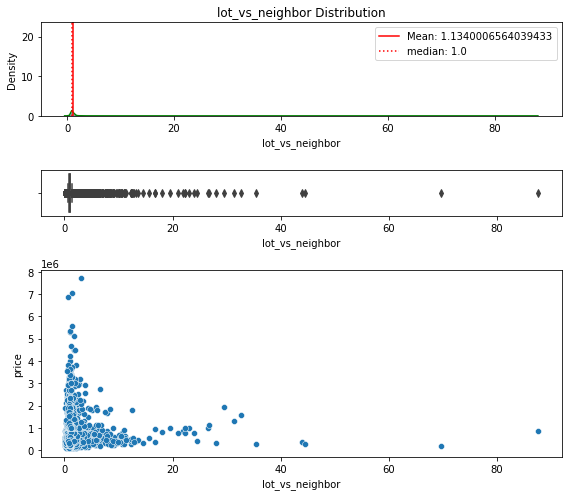

In [62]:
distr_(df, 'lot_vs_neighbor')

In [63]:
# SQF vs. lot size
df['live_lot'] = df['sqft_living']/df['sqft_lot']

live_lot Summary
Median: 0.248
Mean: 0.3244
Max: 4.653846153846154
Min: 0.0006095498431482305
Std: 0.2692


(<Figure size 576x504 with 3 Axes>,
 array([<AxesSubplot:title={'center':'live_lot Distribution'}, xlabel='live_lot', ylabel='Density'>,
        <AxesSubplot:xlabel='live_lot'>,
        <AxesSubplot:xlabel='live_lot', ylabel='price'>], dtype=object))

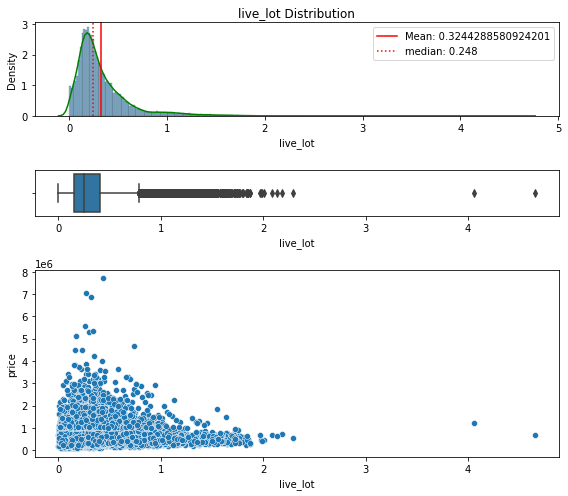

In [64]:
distr_(df, 'live_lot')

In [118]:
df['renovated_yes'] = (df['yr_renovated']!=0).map({True:1,
                                                   False: 0})

In [65]:
# The resulting distributions are all right skewed as shown by the KDE plot and the mean being
# greater than the median

<AxesSubplot:xlabel='renovated_yes', ylabel='price'>

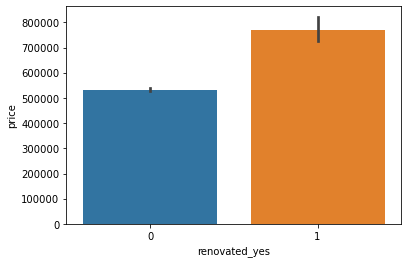

In [47]:
# Homes that have been renovated have greater mean price

sns.barplot(data=df, x='renovated_yes', y='price')

In [67]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basementyes',
       'total_rooms', 'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot'],
      dtype='object')

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  price   R-squared:                       0.710
 Model:                            OLS   Adj. R-squared:                  0.710
 Method:                 Least Squares   F-statistic:                     2614.
 Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
 Time:                        08:15:03   Log-Likelihood:            -2.9117e+05
 No. Observations:               21387   AIC:                         5.824e+05
 Df Residuals:                   21366   BIC:                         5.826e+05
 Df Model:                          20                                         
 Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------

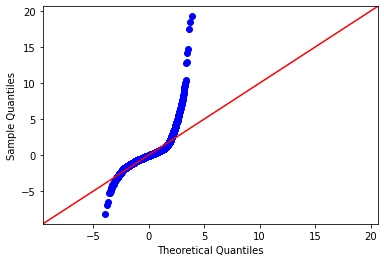

In [68]:
# Run new feature model

X_feats = ['bedrooms', 'bathrooms', 'sqft_living',
           'sqft_lot', 'floors', 'waterfront', 'view',
           'condition', 'grade','sqft_above', 'yr_built',
           'sqft_living15', 'sqft_lot15', 'basementyes', 'zipcode',
           'lat', 'long', 'total_rooms', 'living_vs_neighbor',
           'lot_vs_neighbor','live_lot']


model_summary(df, X_feats, 'price')

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

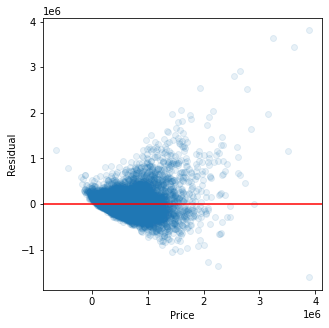

In [69]:
sked_show(df, X_feats)

### New Feature Model Conclusion
- R^2/Adjusted went from 0.70 to 0.71
- Basementyes and lot_vs_neighbor are statistically insignificant
- Skedacicity deviates around $1.2 million
- Next step should be to remove outliers and run tests again

## Z-Score Outlier Removal
- Removing Z-Scores may address my issue of heteroskedacicity
- It will also reduce my right skew because values on the tails will be removed, especially on the right

In [71]:
scaler = StandardScaler()
scaler

StandardScaler()

In [72]:
df_scaled = df.copy()

In [73]:
# Don't need to scale locatation or binary variables

df_scaled.columns
num_cols = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors','view', 'condition', 'grade',
       'sqft_above', 'yr_built','sqft_living15', 'sqft_lot15',
       'total_rooms', 'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot']

In [74]:
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])
df_scaled

id        date      price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.00     -0.41      -1.45        -0.98   
1      6414100192   12/9/2014  538000.00     -0.41       0.17         0.53   
2      5631500400   2/25/2015  180000.00     -1.52      -1.45        -1.43   
3      2487200875   12/9/2014  604000.00      0.70       1.15        -0.13   
4      1954400510   2/18/2015  510000.00     -0.41      -0.15        -0.44   
...           ...         ...        ...       ...        ...          ...   
21574  7430200100   5/14/2014 1220000.00      0.70       1.80         3.08   
21577  8672200110   3/17/2015 1090000.00      1.80       2.12         2.27   
21581   191100405   4/21/2015 1580000.00      0.70       1.47         1.45   
21584   249000205  10/15/2014 1540000.00      1.80       2.12         2.60   
21590  7936000429   3/26/2015 1010000.00      0.70       1.80         1.55   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0         -0.23   -0.92        0.00 -0.31      -0.63  -0.56       -0.74   
1         -0.19    0.93        0.00 -0.31      -0.63  -0.56        0.46   
2         -0.12   -0.92        0.00 -0.31      -0.63  -1.42       -1.23   
3         -0.24   -0.92        0.00 -0.31       2.45  -0.56       -0.89   
4         -0.17   -0.92        0.00 -0.31      -0.63   0.29       -0.13   
...         ...     ...         ...   ...        ...    ...         ...   
21574     -0.14    0.01        0.00 -0.31      -0.63   2.85        1.59   
21577     -0.17    0.93        0.00  2.31      -0.63   2.00        2.87   
21581     -0.12    0.93        0.00 -0.31      -0.63   2.00        1.95   
21584     -0.17    0.93        0.00 -0.31      -0.63   2.85        3.23   
21590     -0.19    0.93        0.00 -0.31      -0.63   1.14        0.98   

      sqft_basement  yr_built  yr_renovated  zipcode   lat    long  \
0               0.0     -0.55          0.00    98178 47.51 -122.26   
1             400.0     -0.68       1991.00    98125 47.72 -122.32   
2               0.0     -1.30          0.00    98028 47.74 -122.23   
3             910.0     -0.21          0.00    98136 47.52 -122.39   
4               0.0      0.54          0.00    98074 47.62 -122.05   
...             ...       ...           ...      ...   ...     ...   
21574        1800.0      1.22          0.00    98074 47.65 -122.07   
21577           0.0      1.19          0.00    98056 47.54 -122.18   
21581           0.0      1.22          0.00    98040 47.57 -122.22   
21584           0.0      1.26          0.00    98004 47.63 -122.20   
21590         910.0      1.29          0.00    98136 47.55 -122.40   

       sqft_living15  sqft_lot15  basementyes  total_rooms  \
0              -0.94       -0.26            0        -1.02   
1              -0.43       -0.19            1        -0.16   
2               1.07       -0.17            0        -1.70   
3              -0.92       -0.28            1         1.03   
4              -0.27       -0.19            0        -0.33   
...              ...         ...          ...          ...   
21574           3.75       -0.06            1         1.37   
21577           1.52       -0.18            0         2.23   
21581           0.44       -0.10            0         1.20   
21584           1.16       -0.14            0         2.23   
21590           0.09       -0.24            1         1.37   

       living_vs_neighbor  lot_vs_neighbor  live_lot  
0                   -0.54            -0.10     -0.43  
1                    1.46            -0.14      0.11  
2                   -2.41             0.08     -0.92  
3                    1.21            -0.10      0.25  
4                   -0.38            -0.04     -0.43  
...                   ...              ...       ...  
21574                0.07            -0.22      0.73  
21577                1.01            -0.09      0.70  
21581                1.36            -0.10      0.05  
21584                1.73            -0.1

In [75]:
# Since everything is either continuous or binary, we don't need to one hot encode any variables at the moment

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  price   R-squared:                       0.710
 Model:                            OLS   Adj. R-squared:                  0.710
 Method:                 Least Squares   F-statistic:                     2614.
 Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
 Time:                        08:31:30   Log-Likelihood:            -2.9117e+05
 No. Observations:               21387   AIC:                         5.824e+05
 Df Residuals:                   21366   BIC:                         5.826e+05
 Df Model:                          20                                         
 Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------

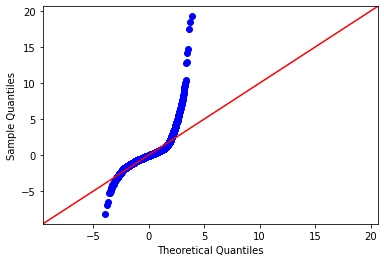

In [76]:
# Run regression with standardized variables. See if there is any differernce
model_summary(df_scaled, X_feats, 'price')

Confirmed that standardized yields the same results as non-standardized

In [77]:
# Scale Price and add onto outlier df
df_scaled2 = df_scaled.copy()

In [78]:
df_scaled2['price'] = scaler.fit_transform(df_scaled2[['price']])
df_scaled2

id        date  price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  -0.87     -0.41      -1.45        -0.98   
1      6414100192   12/9/2014  -0.01     -0.41       0.17         0.53   
2      5631500400   2/25/2015  -0.98     -1.52      -1.45        -1.43   
3      2487200875   12/9/2014   0.17      0.70       1.15        -0.13   
4      1954400510   2/18/2015  -0.08     -0.41      -0.15        -0.44   
...           ...         ...    ...       ...        ...          ...   
21574  7430200100   5/14/2014   1.85      0.70       1.80         3.08   
21577  8672200110   3/17/2015   1.49      1.80       2.12         2.27   
21581   191100405   4/21/2015   2.83      0.70       1.47         1.45   
21584   249000205  10/15/2014   2.72      1.80       2.12         2.60   
21590  7936000429   3/26/2015   1.28      0.70       1.80         1.55   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0         -0.23   -0.92        0.00 -0.31      -0.63  -0.56       -0.74   
1         -0.19    0.93        0.00 -0.31      -0.63  -0.56        0.46   
2         -0.12   -0.92        0.00 -0.31      -0.63  -1.42       -1.23   
3         -0.24   -0.92        0.00 -0.31       2.45  -0.56       -0.89   
4         -0.17   -0.92        0.00 -0.31      -0.63   0.29       -0.13   
...         ...     ...         ...   ...        ...    ...         ...   
21574     -0.14    0.01        0.00 -0.31      -0.63   2.85        1.59   
21577     -0.17    0.93        0.00  2.31      -0.63   2.00        2.87   
21581     -0.12    0.93        0.00 -0.31      -0.63   2.00        1.95   
21584     -0.17    0.93        0.00 -0.31      -0.63   2.85        3.23   
21590     -0.19    0.93        0.00 -0.31      -0.63   1.14        0.98   

      sqft_basement  yr_built  yr_renovated  zipcode   lat    long  \
0               0.0     -0.55          0.00    98178 47.51 -122.26   
1             400.0     -0.68       1991.00    98125 47.72 -122.32   
2               0.0     -1.30          0.00    98028 47.74 -122.23   
3             910.0     -0.21          0.00    98136 47.52 -122.39   
4               0.0      0.54          0.00    98074 47.62 -122.05   
...             ...       ...           ...      ...   ...     ...   
21574        1800.0      1.22          0.00    98074 47.65 -122.07   
21577           0.0      1.19          0.00    98056 47.54 -122.18   
21581           0.0      1.22          0.00    98040 47.57 -122.22   
21584           0.0      1.26          0.00    98004 47.63 -122.20   
21590         910.0      1.29          0.00    98136 47.55 -122.40   

       sqft_living15  sqft_lot15  basementyes  total_rooms  \
0              -0.94       -0.26            0        -1.02   
1              -0.43       -0.19            1        -0.16   
2               1.07       -0.17            0        -1.70   
3              -0.92       -0.28            1         1.03   
4              -0.27       -0.19            0        -0.33   
...              ...         ...          ...          ...   
21574           3.75       -0.06            1         1.37   
21577           1.52       -0.18            0         2.23   
21581           0.44       -0.10            0         1.20   
21584           1.16       -0.14            0         2.23   
21590           0.09       -0.24            1         1.37   

       living_vs_neighbor  lot_vs_neighbor  live_lot  
0                   -0.54            -0.10     -0.43  
1                    1.46            -0.14      0.11  
2                   -2.41             0.08     -0.92  
3                    1.21            -0.10      0.25  
4                   -0.38            -0.04     -0.43  
...                   ...              ...       ...  
21574                0.07            -0.22      0.73  
21577                1.01            -0.09      0.70  
21581                1.36            -0.10      0.05  
21584                1.73            -0.18      0.85  
21590                2.06         

In [79]:
df_scaled2.columns
cols_to_check = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'sqft_living15', 'sqft_lot15', 
       'total_rooms', 'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot']

In [80]:
outliers_z = pd.DataFrame()

for col in cols_to_check:
    outliers_z[col] = df_scaled2[col].abs()>3

outliers_z['total'] = outliers_z.any(axis=1)
df_scaledz_orem = df_scaled[~outliers_z['total']].copy()

In [81]:
df_scaledz_orem.describe()

id      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
count      18739.00   18739.00  18739.00   18739.00     18739.00  18739.00   
mean  4642413539.58  483952.00     -0.05      -0.12        -0.14     -0.12   
std   2864427156.31  234698.26      0.94       0.89         0.81      0.27   
min      1000102.00   82500.00     -2.63      -2.11        -1.86     -0.35   
25%   2202500202.50  312000.00     -0.41      -0.80        -0.74     -0.24   
50%   4019301386.00  434975.00     -0.41      -0.15        -0.25     -0.18   
75%   7348200155.00  600000.00      0.70       0.50         0.37     -0.12   
max   9900000190.00 1640000.00      2.91       2.77         2.95      2.87   

        floors  waterfront     view  condition    grade  sqft_above  yr_built  \
count 18739.00    18739.00 18739.00   18739.00 18739.00    18739.00  18739.00   
mean     -0.08        0.00    -0.18       0.03    -0.12       -0.11     -0.04   
std       0.95        0.02     0.54       1.00     0.87        0.85      0.99   
min      -0.92        0.00    -0.31      -2.17    -2.27       -1.71     -2.42   
25%      -0.92        0.00    -0.31      -0.63    -0.56       -0.75     -0.68   
50%      -0.92        0.00    -0.31      -0.63    -0.56       -0.34      0.03   
75%       0.93        0.00    -0.31       0.91     0.29        0.37      0.78   
max       2.79        1.00     2.31       2.45     2.85        2.99      1.49   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
count      18739.00 18739.00 18739.00 18739.00       18739.00    18739.00   
mean          59.33 98077.57    47.56  -122.21          -0.09       -0.12   
std          338.99    53.42     0.14     0.14           0.88        0.34   
min            0.00 98001.00    47.16  -122.51          -2.00       -0.44   
25%            0.00 98033.00    47.46  -122.33          -0.74       -0.28   
50%            0.00 98065.00    47.57  -122.23          -0.26       -0.19   
75%            0.00 98117.00    47.68  -122.13           0.43       -0.11   
max         2015.00 98199.00    47.78  -121.31           2.99        2.96   

       basementyes  total_rooms  living_vs_neighbor  lot_vs_neighbor  live_lot  
count     18739.00     18739.00            18739.00         18739.00  18739.00  
mean          0.37        -0.09               -0.10            -0.06     -0.08  
std           0.48         0.91                0.81             0.27      0.77  
min           0.00        -2.73               -2.43            -0.80     -1.18  
25%           0.00        -0.68               -0.57            -0.15     -0.61  
50%           0.00         0.01               -0.17            -0.10     -0.30  
75%           1.00         0.69                0.26            -0.04      0.24  
max           1.00         2.91                2.99             2.93      3.00

In [95]:
print(f'Num observations before dropping with Z-score: {len(df_scaled2)}')
print('----Dropping all rows where an outlier occurrs accross columns----')
print(f'Num observations after dropping with Z-score: {len(df_scaledz_orem)}')
print(f'Num observations removed: {len(df_scaled2)-len(df_scaledz_orem)}')
print(f'Num observations removed as percent of original DF: {round(100*float(((len(df_scaled2)-len(df_scaledz_orem))/len(df_scaled2))),2)}%')

Num observations before dropping with Z-score: 21387
----Dropping all rows where an outlier occurrs accross columns----
Num observations after dropping with Z-score: 18739
Num observations removed: 2648
Num observations removed as percent of original DF: 12.38%


In [110]:
print(f"Max price observation: {df_scaledz_orem['price'].max()}")
print(f"Min price observation: {df_scaledz_orem['price'].min()}")

Max price observation: 1640000.0
Min price observation: 82500.0


In [96]:
df_scaledz_orem.drop('sqft_basement', axis=1, inplace=True)

In [99]:
# Run regression to check QQ Plot
df_scaledz_orem.columns
X_ztarg = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'basementyes', 'total_rooms',
       'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot']

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  price   R-squared:                       0.691
 Model:                            OLS   Adj. R-squared:                  0.690
 Method:                 Least Squares   F-statistic:                     1990.
 Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
 Time:                        08:38:29   Log-Likelihood:            -2.4732e+05
 No. Observations:               18739   AIC:                         4.947e+05
 Df Residuals:                   18717   BIC:                         4.949e+05
 Df Model:                          21                                         
 Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------

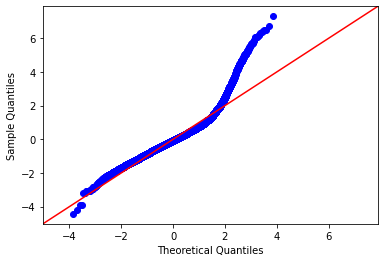

In [100]:
model_summary(df_scaledz_orem, X_ztarg, 'price')

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

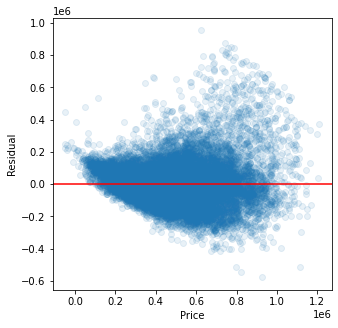

In [102]:
sked_show(df_scaledz_orem, X_ztarg)

### Z-Score Outlier Removal Conclusion
- Our R^2 dropped to 0.691
- QQ plot is more normal
- Sqft_lot, floors, sqft_lot15 are insignificant
- Skecacity is improving but still flairs up towards $1 million

## IQR Outlier Removal
- Checking if IQR outlier removal does a better job at normaling QQ plot and achieving homoskedacicity

In [111]:
def find_outliers_IQR(data):
    """Detects outliers using the 1.5*IQR thresholds.
    Returns a boolean Series where True=outlier"""
    res = data.describe()
    q1 = res['25%']
    q3 = res['75%']
    thresh = 1.5*(q3-q1)
    idx_outliers =(data < (q1-thresh)) | (data > (q3+thresh))
    return idx_outliers

In [120]:
df_iqr = df.copy()

In [121]:
df_iqr.drop(['sqft_basement'], axis=1, inplace=True)

In [123]:
# Only checking IQR outliers for columns that are continuous/ordinal

df_iqr.columns
iqr_check = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot','sqft_above', 'yr_built',
       'sqft_living15', 'sqft_lot15', 'total_rooms',
       'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot']

In [124]:
iqr_outliers = pd.DataFrame()
for col in iqr_check:
    iqr_outliers[col]=find_outliers_IQR(df_iqr[col])
iqr_outliers['total'] = iqr_outliers.any(axis=1)
df_iqr2 = df_iqr[~iqr_outliers['total']].copy()

In [125]:
df_iqr2['renovated_yes'].value_counts(1)

0   0.98
1   0.02
Name: renovated_yes, dtype: float64

In [135]:
print(f'Num observations before dropping with IQR: {len(df_iqr)}')
print(f'Num observations after dropping with IQR: {len(df_iqr2)}')
print(f'Num observations removed: {len(df_iqr)-len(df_iqr2)}')
print(f'Num observations removed as percent of original DF: {(len(df_iqr)-len(df_iqr2))/len(df_iqr):.2}%')

Num observations before dropping with IQR: 21387
Num observations after dropping with IQR: 13389
Num observations removed: 7998
Num observations removed as percent of original DF: 0.37%


In [129]:
print(f"Max price outliers removed: {df_iqr2['price'].max()}")
print(f"Min price outliers removed: {df_iqr2['price'].min()}")

Max price outliers removed: 1120000.0
Min price outliers removed: 81000.0


In [132]:
df_iqr2.columns
iqr_pred = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'basementyes', 'total_rooms',
       'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot', 'renovated_yes']

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  price   R-squared:                       0.711
 Model:                            OLS   Adj. R-squared:                  0.710
 Method:                 Least Squares   F-statistic:                     1494.
 Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
 Time:                        08:51:26   Log-Likelihood:            -1.7382e+05
 No. Observations:               13389   AIC:                         3.477e+05
 Df Residuals:                   13366   BIC:                         3.479e+05
 Df Model:                          22                                         
 Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------

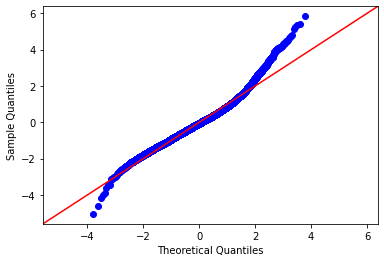

In [133]:
model_summary(df_iqr2, iqr_pred, 'price')


(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

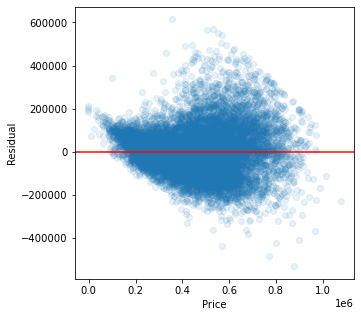

In [134]:
sked_show(df_iqr2, iqr_pred)

### IQR Outlier Removal Conclusion
- R^2 has increased to 0.71
- sqft_lot15 and living_vs_neighbor are insignificant
- QQ plot is significantly more normal. Small peak towards 2nd quantile
- Skedacicity is improved because we have removed more outlier variables
- This model is working better but concerned that too much data has been removed (37%)

## Explore OHE Orindal Variables

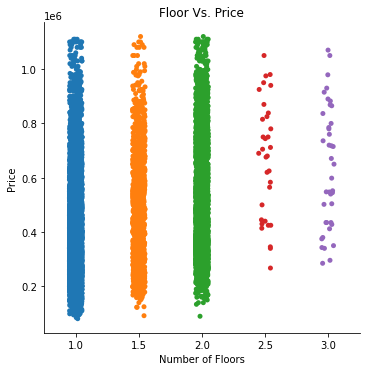

In [137]:
# Less values at floors 2.5/3.0 but the mean price looks higher

g = sns.catplot(data=df_iqr2, x='floors', y='price')
g.axes[0,0].set_xlabel('Number of Floors')
g.axes[0,0].set_ylabel('Price')
g.axes[0,0].set_title('Floor Vs. Price');


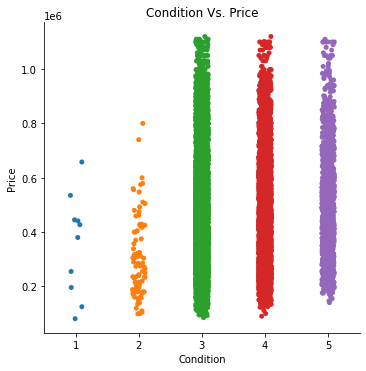

In [138]:
# More values in condition 3-5 than 1-2, and the mean is higher

g = sns.catplot(data=df_iqr2, x='condition', y='price')
g.axes[0,0].set_xlabel('Condition')
g.axes[0,0].set_ylabel('Price')
g.axes[0,0].set_title('Condition Vs. Price');

<AxesSubplot:xlabel='condition', ylabel='price'>

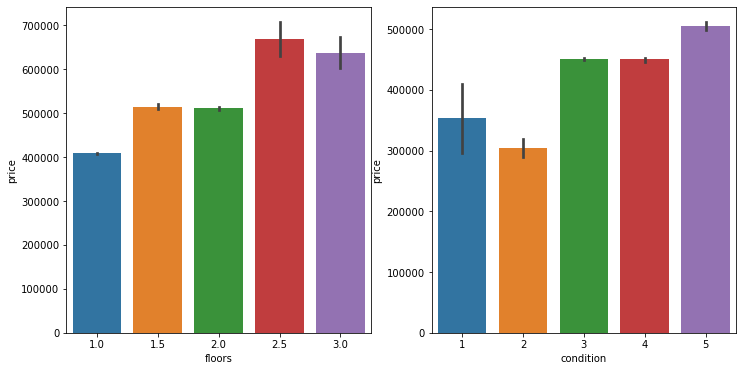

In [139]:
# Looks like a rough ordinal relationship

fig, axes = plt.subplots(figsize=(12,6), ncols=2, nrows=1)
sns.barplot(data=df_iqr2, x='floors', y='price', ax=axes[0], ci=68)
sns.barplot(data=df_iqr2, x='condition', y='price', ax=axes[1], ci=68)

In [140]:
# OHE: Floors/condition
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
encoder

OneHotEncoder(drop='first', sparse=False)

In [141]:
cat_cols=['floors', 'condition']

In [142]:
encoder.fit(df_iqr2[cat_cols])

ohe_vars = encoder.transform(df_iqr2[cat_cols])
encoder.get_feature_names(cat_cols)
cat_vars = pd.DataFrame(ohe_vars,columns=encoder.get_feature_names(cat_cols))

In [143]:
# Do this for formula OLS

name_dict = {}
for col in cat_vars.columns:
    name_dict[col]=col.replace('.','_')
name_dict

{'floors_1.5': 'floors_1_5',
 'floors_2.0': 'floors_2_0',
 'floors_2.5': 'floors_2_5',
 'floors_3.0': 'floors_3_0',
 'condition_2': 'condition_2',
 'condition_3': 'condition_3',
 'condition_4': 'condition_4',
 'condition_5': 'condition_5'}

In [144]:
cat_vars.rename(columns=name_dict, inplace=True)
cat_vars

floors_1_5  floors_2_0  floors_2_5  floors_3_0  condition_2  \
0            0.00        0.00        0.00        0.00         0.00   
1            0.00        1.00        0.00        0.00         0.00   
2            0.00        0.00        0.00        0.00         0.00   
3            0.00        0.00        0.00        0.00         0.00   
4            0.00        1.00        0.00        0.00         0.00   
...           ...         ...         ...         ...          ...   
13384        0.00        1.00        0.00        0.00         0.00   
13385        0.00        1.00        0.00        0.00         0.00   
13386        0.00        1.00        0.00        0.00         0.00   
13387        0.00        1.00        0.00        0.00         0.00   
13388        0.00        1.00        0.00        0.00         0.00   

       condition_3  condition_4  condition_5  
0             1.00         0.00         0.00  
1             1.00         0.00         0.00  
2             0.00         0.00         1.00  
3             1.00         0.00         0.00  
4             1.00         0.00         0.00  
...            ...          ...          ...  
13384         1.00         0.00         0.00  
13385         1.00         0.00         0.00  
13386         1.00         0.00         0.00  
13387         1.00         0.00         0.00  
13388         1.00         0.00         0.00  

[13389 rows x 8 columns]

In [145]:
df_iqr2 = df_iqr2.reset_index()

In [146]:
df_iqr2.drop('index', axis=1)

id        date      price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.00         3       1.00         1180   
1      6414100192   12/9/2014  538000.00         3       2.25         2570   
2      2487200875   12/9/2014  604000.00         4       3.00         1960   
3      1954400510   2/18/2015  510000.00         3       2.00         1680   
4      1321400060   6/27/2014  257500.00         3       2.25         1715   
...           ...         ...        ...       ...        ...          ...   
13384  5556300109  11/21/2014 1080000.00         5       3.50         3230   
13385  1121000357   8/27/2014 1090000.00         4       3.00         3410   
13386  2428100080   10/1/2014 1060000.00         4       3.00         2990   
13387  8924100308    2/3/2015 1050000.00         4       2.50         3260   
13388  1070000180  10/15/2014 1110000.00         4       3.50         3660   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0          5650    1.00        0.00  0.00          3      7        1180   
1          7242    2.00        0.00  0.00          3      7        2170   
2          5000    1.00        0.00  0.00          5      7        1050   
3          8080    1.00        0.00  0.00          3      8        1680   
4          6819    2.00        0.00  0.00          3      7        1715   
...         ...     ...         ...   ...        ...    ...         ...   
13384      7560    2.00        0.00  0.00          3     10        3230   
13385      6541    2.00        0.00  2.00          3      9        2680   
13386      6695    2.00        0.00  0.00          3     10        2990   
13387      5974    2.00        0.00  1.00          3      9        2820   
13388      4760    2.00        0.00  0.00          3      9        2840   

       yr_built  yr_renovated  zipcode   lat    long  sqft_living15  \
0          1955          0.00    98178 47.51 -122.26           1340   
1          1951       1991.00    98125 47.72 -122.32           1690   
2          1965          0.00    98136 47.52 -122.39           1360   
3          1987          0.00    98074 47.62 -122.05           1800   
4          1995          0.00    98003 47.31 -122.33           2238   
...         ...           ...      ...   ...     ...            ...   
13384      2007          0.00    98052 47.65 -122.12           3230   
13385      2007          0.00    98126 47.54 -122.38           2300   
13386      2014          0.00    98075 47.58 -122.05           2760   
13387      2007          0.00    98115 47.68 -122.27           2260   
13388      2014          0.00    98199 47.65 -122.41           3210   

       sqft_lot15  basementyes  total_rooms  living_vs_neighbor  \
0            5650            0         4.00                0.88   
1            7639            1         5.25                1.52   
2            5000            1         7.00                1.44   
3            7503            0         5.00                0.93   
4            6819            0         5.25                0.77   
...           ...          ...          ...                 ...   
13384        8580            0         8.50                1.00   
13385        6345            1         7.00                1.48   
13386        6600            0         7.00                1.08   
13387        6780            1         6.50                1.44   
13388        4640            1         7.50                1.14   

       lot_vs_neighbor  live_lot  renovated_yes  
0                 1.00      0.21              0  
1                 0.95      0.35              1  
2                 1.00      0.39              0  
3                 1.08      0.21              0  
4                 1.00      0.25              0  
...                ...       ...            ...  
13384             0.88      0.43              0  
13385             1.03      0.52              0  
13386             1.01      0.45              0  
13387             0

In [147]:
df_iqr3 = pd.concat([df_iqr2, cat_vars], axis=1)

In [148]:
df_iqr3.drop('index', axis=1, inplace=True)

In [149]:
df_iqr3.drop(['floors', 'condition'], axis=1, inplace=True)

In [152]:
df_iqr3.columns
X_iqr_ohetargs = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'waterfront', 'view', 'grade', 'sqft_above', 'yr_built',
       'sqft_living15', 'sqft_lot15', 'basementyes', 'lat', 'long', 'zipcode',
       'total_rooms', 'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot',
       'renovated_yes', 'floors_1_5', 'floors_2_0', 'floors_2_5', 'floors_3_0',
       'condition_2', 'condition_3', 'condition_4', 'condition_5']

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  price   R-squared:                       0.710
 Model:                            OLS   Adj. R-squared:                  0.710
 Method:                 Least Squares   F-statistic:                     1214.
 Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
 Time:                        09:03:31   Log-Likelihood:            -1.7383e+05
 No. Observations:               13389   AIC:                         3.477e+05
 Df Residuals:                   13361   BIC:                         3.479e+05
 Df Model:                          27                                         
 Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------

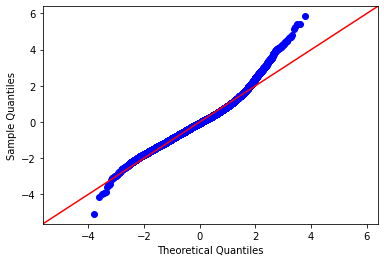

In [153]:
model_summary(df_iqr3, X_iqr_ohetargs, 'price')

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

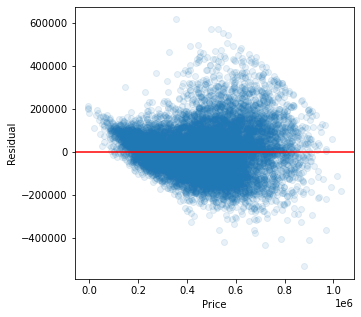

In [154]:
sked_show(df_iqr3, X_iqr_ohetargs)

### OHE Ordinal Conclusion
- R^2 did not change
- Majority of the OHE variables are not statistically significant so may drop them
- QQ plot looks normal
- Sked looks passable

## Check assumptions of multicollinearity and correlation

In [89]:
#https://nbviewer.jupyter.org/github/flatiron-school/Online-DS-FT-022221-Cohort-Notes/blob/master/Phase_2/topic_19_part1_multiple_regression/topic_19_Multiple_Regression_v2-SG.ipynb

df_iqr2.corr()['price'].round(2).sort_values(ascending=False)

price                 1.00000
grade                 0.58000
sqft_living           0.57000
sqft_living15         0.56000
lat                   0.48000
sqft_above            0.44000
live_lot              0.40000
bathrooms             0.38000
total_rooms           0.37000
bedrooms              0.27000
floors                0.26000
view                  0.24000
basementyes           0.19000
living_vs_neighbor    0.18000
renovated_yes         0.09000
yr_renovated          0.09000
condition             0.07000
waterfront            0.04000
long                  0.04000
index                 0.04000
id                    0.03000
zipcode               0.01000
sqft_lot15           -0.01000
lot_vs_neighbor      -0.01000
yr_built             -0.02000
sqft_lot             -0.02000
Name: price, dtype: float64

<AxesSubplot:>

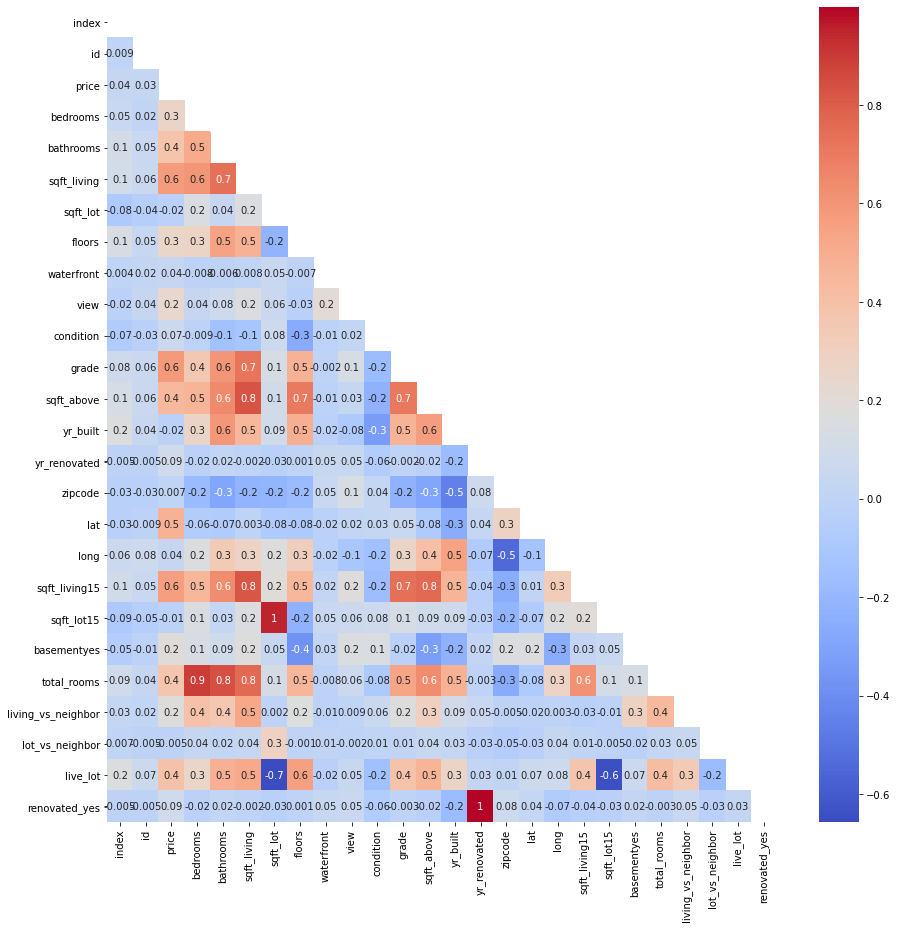

In [91]:
# https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07
corr2 = df_iqr2.corr()

fig, ax = plt.subplots(figsize=(15,15))
matrix = np.triu(corr2)
sns.heatmap(corr2,cmap="coolwarm", annot=True, fmt='.1g', mask=matrix)

In [171]:
def corr_finder(df):
    df_corr = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
    df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))
    df_corr.set_index(['pairs'], inplace = True)
    df_corr.drop(columns=['level_1', 'level_0'], inplace = True)

    # # cc for correlation coefficient
    df_corr.columns = ['cc']
    df_corr.drop_duplicates(inplace=True)

    return df_corr[(df_corr.cc>.75) & (df_corr.cc<1)]

In [172]:
#https://github.com/learn-co-curriculum/dsc-multicollinearity-of-features-lab/tree/solution
corr_finder(df_iqr2)

cc
pairs                             
(yr_renovated, renovated_yes) 1.00
(sqft_lot15, sqft_lot)        0.95
(total_rooms, bedrooms)       0.89
(total_rooms, bathrooms)      0.84
(sqft_living, sqft_above)     0.83
(sqft_living15, sqft_living)  0.82
(sqft_above, sqft_living15)   0.77
(sqft_living, total_rooms)    0.76

Methodology will be to check each pair for correlation with price and drop the feature that 
has a lower correlation with price

yr_renovated, renovated_yes: DROP - yr_renovated (should be dropped anyway)

sqft_lot, sqft_lot15: DROP - sqft_lot15

total_rooms, bedrooms: DROP - total rooms because it takes away from nuance of bath/bed

bathrooms, total_rooms: DROP - total rooms because it takes away from nuance of bath/bed

sqft_living, sqft_above: DROP - sqft_above

sqft_living, sqft_living15: DROP - sqft_living_15

sqft_above, sqft_living15: DROP - sqft_living_15

sqft_living, total_rooms: DROP - total_rooms

In [155]:
df_iqr_nocolin = df_iqr2.copy()

In [156]:
df_iqr_nocolin.columns
cols_to_drop = ['index','yr_renovated', 'sqft_lot15', 'total_rooms', 'sqft_above', 'sqft_living15']

In [157]:
df_iqr_nocolin.drop(columns=cols_to_drop, axis=1, inplace=True)

In [158]:
df_iqr_nocolin.columns
X_nocolin_targs = ['bedrooms', 'bathrooms', 'sqft_living', 'zipcode', 'lat', 'long',
       'sqft_lot', 'waterfront', 'floors','view', 'condition', 'grade',
       'yr_built', 'basementyes', 'living_vs_neighbor', 'lot_vs_neighbor',
       'live_lot', 'renovated_yes']

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  price   R-squared:                       0.708
 Model:                            OLS   Adj. R-squared:                  0.707
 Method:                 Least Squares   F-statistic:                     1797.
 Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
 Time:                        09:09:32   Log-Likelihood:            -1.7390e+05
 No. Observations:               13389   AIC:                         3.478e+05
 Df Residuals:                   13370   BIC:                         3.480e+05
 Df Model:                          18                                         
 Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------

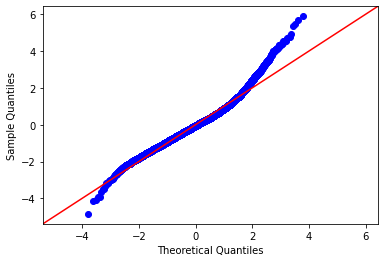

In [159]:
model_summary(df_iqr_nocolin, X_nocolin_targs, 'price')

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

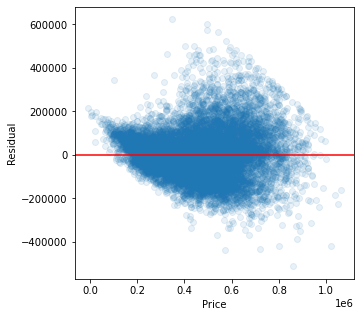

In [160]:
sked_show(df_iqr_nocolin, X_nocolin_targs)

### Multicolinearity Conclusion
- R^2 of 0.708
- QQ plot looks normal
- No features with insignificant p-values
- Sked looks the same

## Check Assumption of Linearity

In [99]:
# commenting out for speed

# nocolin_cols = ['bedrooms', 'bathrooms', 'sqft_living',
#        'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
#        'yr_built', 'basementyes', 'living_vs_neighbor', 'lot_vs_neighbor',
#        'live_lot', 'renovated_yes']

# fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20,15))
# for ax, col in zip(axes.flatten(), nocolin_cols):
#     sns.regplot(data=df_iqr_nocolin, x=col, y='price', ax=ax, line_kws={'color': 'red'})
#     ax.set_title(f'{col} vs. price')
# fig.tight_layout

sqft_lot does not have a linear relationship

yr_built does not have a linear relationship

lot_vs_neighbor does not have a linear relationship

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  price   R-squared:                       0.670
 Model:                            OLS   Adj. R-squared:                  0.670
 Method:                 Least Squares   F-statistic:                     1696.
 Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
 Time:                        09:14:07   Log-Likelihood:            -1.7471e+05
 No. Observations:               13389   AIC:                         3.494e+05
 Df Residuals:                   13372   BIC:                         3.496e+05
 Df Model:                          16                                         
 Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------

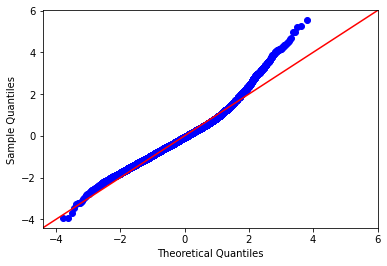

In [162]:

X_iqr_nolin = ['bedrooms', 'bathrooms', 'sqft_living', 'lat', 'long',
             'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode',
             'basementyes', 'living_vs_neighbor', 'lot_vs_neighbor',
             'live_lot', 'renovated_yes']
model_summary(df_iqr_nocolin, X_iqr_nolin, 'price')


(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

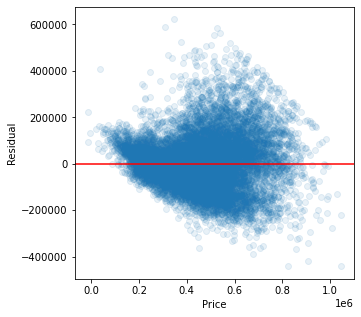

In [163]:
sked_show(df_iqr_nocolin, X_iqr_nolin)

### Linearity Conclusion
- R^2 has dropped to 0.67
- No insignificant p-values
- QQ plot looks normal
- Sked looks normal
- One of the features we dropped must have had a significant impact on our target variable

## Pivoting Back to Z-Score
- R^2 was reduced
- Too many values may have been unnecessarily removed

In [165]:
df_z = df_scaledz_orem.copy()
df_z.drop('yr_renovated', axis=1, inplace=True)

## Check for multicolinearity

Not going to OHE the variables that were unsuccesful in IQR method


In [166]:
# Check correlation
def initial_corr_check(df, col='price'):
    return df_z.corr()['price'].round(2).sort_values(ascending=False)
initial_corr_check(df_z)

price                 1.00
grade                 0.63
sqft_living           0.62
sqft_living15         0.57
sqft_above            0.52
bathrooms             0.45
total_rooms           0.43
lat                   0.43
bedrooms              0.31
floors                0.28
live_lot              0.24
living_vs_neighbor    0.24
view                  0.20
basementyes           0.17
sqft_lot              0.10
sqft_lot15            0.09
condition             0.05
long                  0.04
lot_vs_neighbor       0.03
yr_built              0.03
waterfront            0.03
id                    0.00
zipcode              -0.04
Name: price, dtype: float64

In [167]:
def corr_triangle(df):
    corr2 = df.corr()

    fig, ax = plt.subplots(figsize=(15,15))
    matrix = np.triu(corr2)
    return sns.heatmap(corr2,cmap="coolwarm", annot=True, fmt='.1g', mask=matrix)

<AxesSubplot:>

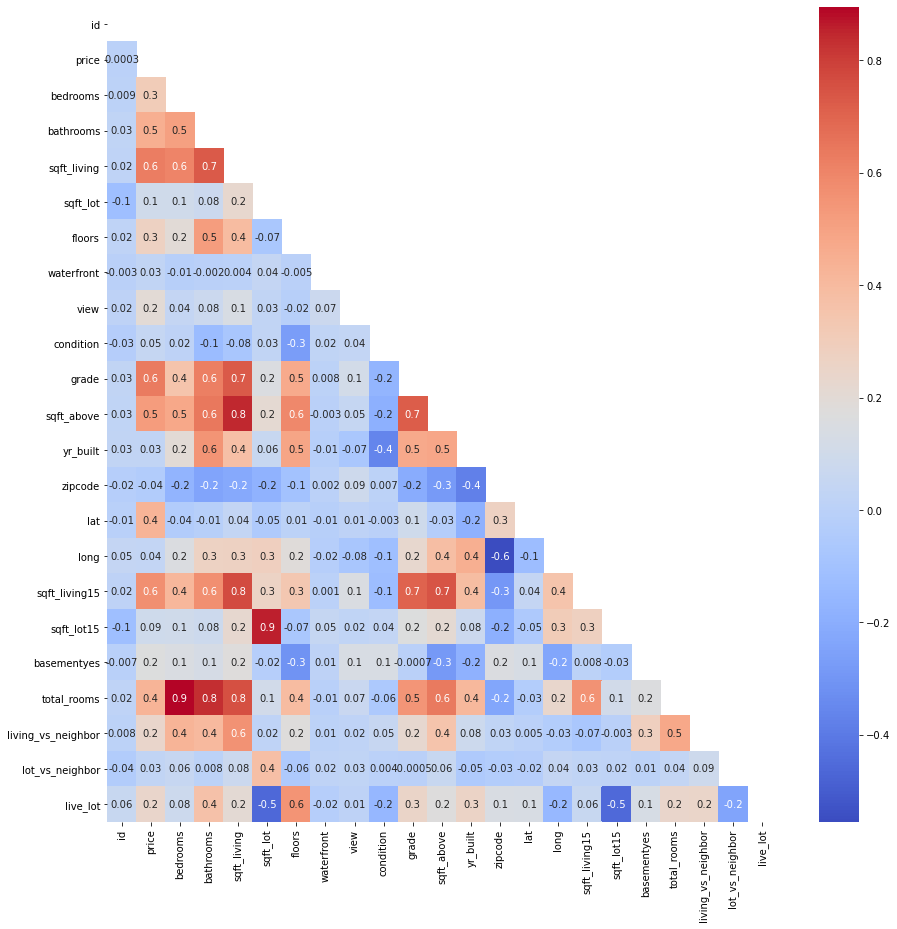

In [168]:
corr_triangle(df_z)

In [173]:
# To Drop based on mulitcolinearity:
# total_rooms, bedrooms -DROP total_rooms (nuance)
# sqft_lot, sqft_lot15 -DROP sqft_lot15
# sqft_living, sqft_above -DROP sqft
# bathrooms, total_rooms -DROP total_rooms(nuance)
# sqft_living, sqft_living15 -DROP sqft_living15
# total_rooms, sqft_living -DROP total_rooms

corr_finder(df_z)

cc
pairs                            
(bedrooms, total_rooms)      0.90
(sqft_lot15, sqft_lot)       0.86
(sqft_above, sqft_living)    0.85
(bathrooms, total_rooms)     0.84
(sqft_living, sqft_living15) 0.77
(total_rooms, sqft_living)   0.76

In [174]:
# Confirm no more multicolinearity issues

corr_finder(df_z.drop(['total_rooms', 'sqft_lot15', 'sqft_above', 'sqft_living15'], axis=1))

Empty DataFrame
Columns: [cc]
Index: []

<AxesSubplot:xlabel='total_rooms', ylabel='price'>

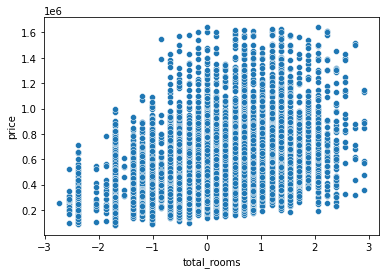

In [111]:
sns.scatterplot(data=df_z, x='total_rooms', y='price', ci=68)

In [112]:
df_z_multirem = df_z.copy()

In [113]:
df_z_multirem.drop(['total_rooms', 'sqft_lot15', 'sqft_above', 'sqft_living15'], axis=1, inplace=True)

In [114]:
df_z_multirem.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'yr_built', 'zipcode', 'lat', 'long', 'basementyes',
       'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot', 'renovated_yes'],
      dtype='object')

In [115]:
X_multirem_targ = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'yr_built', 'zipcode', 'lat', 'long', 'basementyes',
       'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot', 'renovated_yes']

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  price   R-squared:                       0.689
 Model:                            OLS   Adj. R-squared:                  0.689
 Method:                 Least Squares   F-statistic:                     2307.
 Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
 Time:                        07:32:01   Log-Likelihood:            -2.4737e+05
 No. Observations:               18739   AIC:                         4.948e+05
 Df Residuals:                   18720   BIC:                         4.949e+05
 Df Model:                          18                                         
 Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------

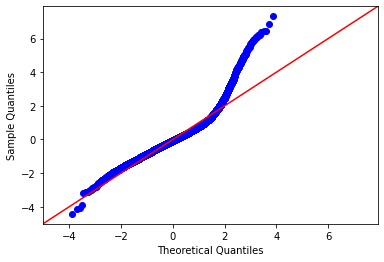

In [116]:
model_summary(df_z_multirem, X_multirem_targ, 'price')

In [117]:
# Check floors

<AxesSubplot:xlabel='floors', ylabel='price'>

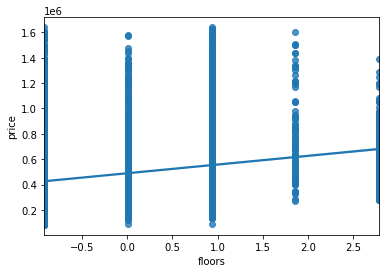

In [118]:
sns.regplot(data=df_z_multirem, x='floors', y='price')

<AxesSubplot:xlabel='floors', ylabel='price'>

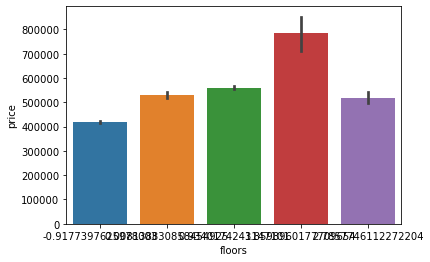

In [119]:
sns.barplot(data=df_z_multirem, x='floors', y='price')

In [120]:
df_z_multirem['floors'].value_counts()

-0.91774    9809
0.93402     6847
0.00814     1674
2.78577      323
1.85990       86
Name: floors, dtype: int64

In [121]:
# Check for linearity
def lin_check(df, col_list, y='price'):
    fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20,15))
    for ax, col in zip(axes.flatten(), col_list):
        sns.regplot(data=df_iqr_nocolin, x=col, y='price', ax=ax, line_kws={'color': 'red'})
        ax.set_title(f'{col} vs. price')
    return fig.tight_layout

In [122]:
# commenting out for speed

# lin_check(df, X_multirem_targ)

In [123]:
# Year built no relationship, check basement, check lot v neighbor, check renovated, sqft_lot

No basement mean: 382000.0
Yes basement mean: 475000.0


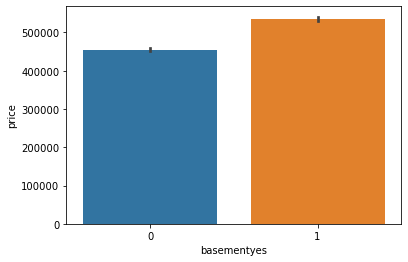

In [124]:
# Does appear to be a difference in mean so it will be included

sns.barplot(data=df_z_multirem, x='basementyes', y='price')
no_basemean = round(df_iqr_nocolin[df_iqr_nocolin['basementyes']==0]['price'].median(),2)
yes_basemean = round(df_iqr_nocolin[df_iqr_nocolin['basementyes']==1]['price'].median(),2)
print(f'No basement mean: {no_basemean}')
print(f'Yes basement mean: {yes_basemean}')

No renomation mean: 450878.39
Yes renovation mean: 562085.18


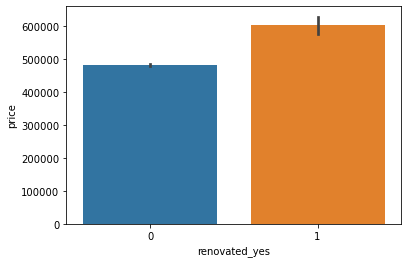

In [125]:
sns.barplot(data=df_z_multirem, x='renovated_yes', y='price')
no_ren = round(df_iqr_nocolin[df_iqr_nocolin['renovated_yes']==0]['price'].mean(),2)
yes_ren = round(df_iqr_nocolin[df_iqr_nocolin['renovated_yes']==1]['price'].mean(),2)
print(f'No renomation mean: {no_ren}')
print(f'Yes renovation mean: {yes_ren}')

<AxesSubplot:xlabel='condition', ylabel='price'>

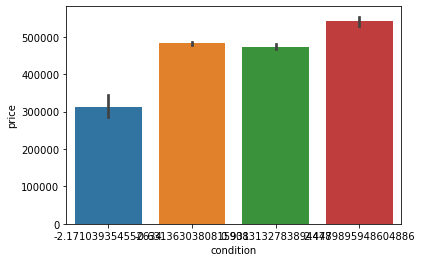

In [126]:
sns.barplot(data=df_z_multirem, x='condition', y='price')

In [127]:
# Dropping sqft_lot

In [128]:
X_lin_target = ['bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'waterfront', 'view', 'condition', 'grade',
       'yr_built', 'zipcode', 'lat', 'long', 'basementyes',
       'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot', 'renovated_yes']

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  price   R-squared:                       0.689
 Model:                            OLS   Adj. R-squared:                  0.689
 Method:                 Least Squares   F-statistic:                     2441.
 Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
 Time:                        07:32:05   Log-Likelihood:            -2.4737e+05
 No. Observations:               18739   AIC:                         4.948e+05
 Df Residuals:                   18721   BIC:                         4.949e+05
 Df Model:                          17                                         
 Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------

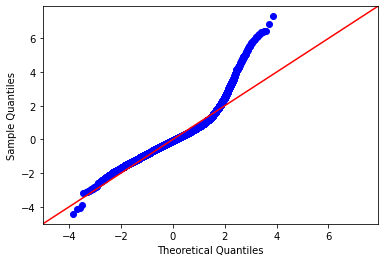

In [129]:
model_summary(df_z_multirem, X_lin_target, 'price')

In [130]:
# Testing dropping lat/long/zip

In [131]:
X_loc_target = ['bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'waterfront', 'view', 'condition', 'grade',
       'yr_built', 'basementyes',
       'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot', 'renovated_yes']

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  price   R-squared:                       0.600
 Model:                            OLS   Adj. R-squared:                  0.599
 Method:                 Least Squares   F-statistic:                     2003.
 Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
 Time:                        07:32:05   Log-Likelihood:            -2.4974e+05
 No. Observations:               18739   AIC:                         4.995e+05
 Df Residuals:                   18724   BIC:                         4.996e+05
 Df Model:                          14                                         
 Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------

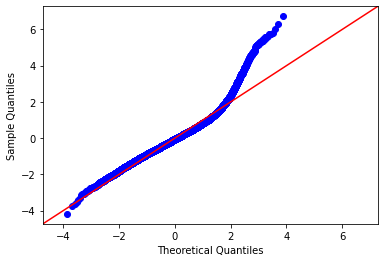

In [132]:
model_summary(df_z_multirem, X_loc_target, 'price')

In [133]:
# P-value drops significantly, try turning zipcode into OHE

In [134]:
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder(sparse=False, drop='first')
# encoder
# cat_cols=['floors', 'condition']
# encoder.fit(df_iqr2[cat_cols])

# ohe_vars = encoder.transform(df_iqr2[cat_cols])
# encoder.get_feature_names(cat_cols)
# cat_vars = pd.DataFrame(ohe_vars,columns=encoder.get_feature_names(cat_cols))

In [135]:
df_z_loc = df_z_multirem.copy()

In [136]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
encoder
loc_col=['zipcode']
encoder.fit(df_z_loc[loc_col])

ohe_vars2 = encoder.transform(df_z_loc[loc_col])
encoder.get_feature_names(loc_col)
cat_vars2 = pd.DataFrame(ohe_vars2,columns=encoder.get_feature_names(loc_col))

In [137]:
cat_vars2

zipcode_98002  zipcode_98003  zipcode_98004  zipcode_98005  \
0            0.00000        0.00000        0.00000        0.00000   
1            0.00000        0.00000        0.00000        0.00000   
2            0.00000        0.00000        0.00000        0.00000   
3            0.00000        0.00000        0.00000        0.00000   
4            0.00000        0.00000        0.00000        0.00000   
...              ...            ...            ...            ...   
18734        0.00000        0.00000        0.00000        0.00000   
18735        0.00000        0.00000        0.00000        0.00000   
18736        0.00000        0.00000        0.00000        0.00000   
18737        0.00000        0.00000        0.00000        0.00000   
18738        0.00000        0.00000        0.00000        0.00000   

       zipcode_98006  zipcode_98007  zipcode_98008  zipcode_98010  \
0            0.00000        0.00000        0.00000        0.00000   
1            0.00000        0.00000        0.00000        0.00000   
2            0.00000        0.00000        0.00000        0.00000   
3            0.00000        0.00000        0.00000        0.00000   
4            0.00000        0.00000        0.00000        0.00000   
...              ...            ...            ...            ...   
18734        0.00000        0.00000        0.00000        0.00000   
18735        0.00000        0.00000        0.00000        0.00000   
18736        0.00000        0.00000        0.00000        0.00000   
18737        0.00000        0.00000        0.00000        0.00000   
18738        0.00000        0.00000        0.00000        0.00000   

       zipcode_98011  zipcode_98014  zipcode_98019  zipcode_98022  \
0            0.00000        0.00000        0.00000        0.00000   
1            0.00000        0.00000        0.00000        0.00000   
2            0.00000        0.00000        0.00000        0.00000   
3            0.00000        0.00000        0.00000        0.00000   
4            0.00000        0.00000        0.00000        0.00000   
...              ...            ...            ...            ...   
18734        0.00000        0.00000        0.00000        0.00000   
18735        0.00000        0.00000        0.00000        0.00000   
18736        0.00000        0.00000        0.00000        0.00000   
18737        0.00000        0.00000        0.00000        0.00000   
18738        0.00000        0.00000        0.00000        0.00000   

       zipcode_98023  zipcode_98024  zipcode_98027  zipcode_98028  \
0            0.00000        0.00000        0.00000        0.00000   
1            0.00000        0.00000        0.00000        0.00000   
2            0.00000        0.00000        0.00000        1.00000   
3            0.00000        0.00000        0.00000        0.00000   
4            0.00000        0.00000        0.00000        0.00000   
...              ...            ...            ...            ...   
18734        0.00000        0.00000        0.00000        0.00000   
18735        0.00000        0.00000        0.00000        0.00000   
18736        0.00000        0.00000        0.00000        0.00000   
18737        0.00000        0.00000        0.00000        0.00000   
18738        0.00000        0.00000        0.00000        0.00000   

       zipcode_98029  zipcode_98030  zipcode_98031  zipcode_98032  \
0            0.00000        0.00000        0.00000        0.00000   
1            0.00000        0.00000        0.00000        0.00000   
2            0.00000        0.00000        0.00000        0.00000   
3            0.00000        0.00000        0.00000        0.00000   
4            0.00000        0.00000        0.00000        0.00000   
...              ...            ...            ...            ...   
18734        0.00000        0.00000        0.00000        0.00000   
18735        0.00000        0.00000        0.00000        0.00000   
18736        0.00000        0.00000        0.00000        0.00000   
1

In [138]:
df_z_loc = df_z_loc.reset_index()

In [139]:
df_z_loc2 = pd.concat([df_z_loc, cat_vars2], axis=1)

In [140]:
df_z_loc2

index          id       date         price  bedrooms  bathrooms  \
0          0  7129300520 2014-10-13  221900.00000  -0.41185   -1.45459   
1          1  6414100192 2014-12-09  538000.00000  -0.41185    0.17194   
2          2  5631500400 2015-02-25  180000.00000  -1.51952   -1.45459   
3          3  2487200875 2014-12-09  604000.00000   0.69582    1.14785   
4          4  1954400510 2015-02-18  510000.00000  -0.41185   -0.15337   
...      ...         ...        ...           ...       ...        ...   
18734  21461  7010700308 2014-11-12 1010000.00000   0.69582    1.47316   
18735  21485  4233600150 2015-02-03 1150000.00000   1.80349    2.77438   
18736  21577  8672200110 2015-03-17 1090000.00000   1.80349    2.12377   
18737  21581   191100405 2015-04-21 1580000.00000   0.69582    1.47316   
18738  21590  7936000429 2015-03-26 1010000.00000   0.69582    1.79846   

       sqft_living  sqft_lot   floors  waterfront     view  condition  \
0         -0.98204  -0.22816 -0.91774     0.00000 -0.30530   -0.63136   
1          0.53098  -0.18985  0.93402     0.00000 -0.30530   -0.63136   
2         -1.42833  -0.12349 -0.91774     0.00000 -0.30530   -0.63136   
3         -0.13301  -0.24380 -0.91774     0.00000 -0.30530    2.44799   
4         -0.43779  -0.16969 -0.91774     0.00000 -0.30530   -0.63136   
...            ...       ...      ...         ...      ...        ...   
18734      1.66302  -0.26786  0.93402     0.00000 -0.30530   -0.63136   
18735      2.09842  -0.16555  0.93402     0.00000 -0.30530   -0.63136   
18736      2.27258  -0.16819  0.93402     0.00000  2.31279   -0.63136   
18737      1.44532  -0.12048  0.93402     0.00000 -0.30530   -0.63136   
18738      1.55417  -0.19086  0.93402     0.00000 -0.30530   -0.63136   

         grade  yr_built  zipcode      lat       long  basementyes  \
0     -0.56451  -0.54875    98178 47.51120 -122.25700            0   
1     -0.56451  -0.68492    98125 47.72100 -122.31900            1   
2     -1.41822  -1.29771    98028 47.73790 -122.23300            0   
3     -0.56451  -0.20831    98136 47.52080 -122.39300            1   
4      0.28920   0.54065    98074 47.61680 -122.04500            0   
...        ...       ...      ...      ...        ...          ...   
18734  1.14291   1.22152    98199 47.65800 -122.39600            1   
18735  1.99662   1.49387    98075 47.59740 -122.01300            0   
18736  1.99662   1.18748    98056 47.53540 -122.18100            0   
18737  1.99662   1.22152    98040 47.56530 -122.22300            0   
18738  1.14291   1.28961    98136 47.55370 -122.39800            1   

       living_vs_neighbor  lot_vs_neighbor  live_lot  renovated_yes  \
0                -0.53992         -0.10418  -0.42942              0   
1                 1.45891         -0.14459   0.11312              1   
2                -2.40571          0.08271  -0.91929              0   
3                 1.21055         -0.10418   0.25105              0   
4                -0.37525         -0.04439  -0.43287              0   
...                   ...              ...       ...            ...   
18734             2.40357         -0.10418   2.14776              0   
18735             0.42595         -0.10418   0.60009              0   
18736             1.00777         -0.08840   0.69749              0   
18737             1.36015         -0.10418   0.04593              0   
18738             2.05684          0.02122   0.60587              0   

       zipcode_98002  zipcode_98003  zipcode_98004  zipcode_98005  \
0            0.00000        0.00000        0.00000        0.00000   
1            0.00000        0.00000        0.00000        0.00000   
2            0.00000        0.00000        0.00000        0.00000   
3            0.00000        0.00000        0.00000        0.00000   
4            0.00000        0.00000        0.00000        0.00000   
...              ...            ...            ...            ...   
18734        0.00000        0.00000        0.00000        0.0000

In [141]:
df_z_loc2.drop('zipcode', axis=1, inplace=True)

In [142]:
df_z_loc2.columns

Index(['index', 'id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'yr_built', 'lat', 'long', 'basementyes', 'living_vs_neighbor',
       'lot_vs_neighbor', 'live_lot', 'renovated_yes', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98075', 'zipco

In [143]:
X_z_zip = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'yr_built', 'basementyes', 'living_vs_neighbor',
       'lot_vs_neighbor', 'live_lot', 'renovated_yes', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102',
       'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
       'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119',
       'zipcode_98122', 'zipcode_98125', 'zipcode_98126', 'zipcode_98133',
       'zipcode_98136', 'zipcode_98144', 'zipcode_98146', 'zipcode_98148',
       'zipcode_98155', 'zipcode_98166', 'zipcode_98168', 'zipcode_98177',
       'zipcode_98178', 'zipcode_98188', 'zipcode_98198', 'zipcode_98199']

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  price   R-squared:                       0.835
 Model:                            OLS   Adj. R-squared:                  0.834
 Method:                 Least Squares   F-statistic:                     1121.
 Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
 Time:                        07:32:06   Log-Likelihood:            -2.4146e+05
 No. Observations:               18739   AIC:                         4.831e+05
 Df Residuals:                   18654   BIC:                         4.837e+05
 Df Model:                          84                                         
 Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------

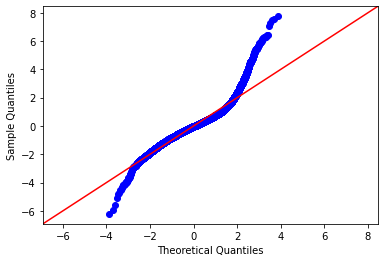

In [144]:
model_summary(df_z_loc2, X_z_zip, 'price')

In [145]:
outcome = 'price'
predictors = X_z_zip
pred_sum = '+'.join(predictors)
formula = outcome + '~' + pred_sum

In [146]:
model = ols(formula=formula, data=df_z_loc2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     1121.
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        07:32:06   Log-Likelihood:            -2.4146e+05
No. Observations:               18739   AIC:                         4.831e+05
Df Residuals:                   18654   BIC:                         4.837e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           3.404e+05   5299.557     64.227      0.000     3.3e+05    3.51e+05
bedrooms           -5367.3349    992.890     -5.406      0.000   -7313.490   -3421.180
bathrooms           1.508e+04   1395.856     10.807      0.000    1.23e+04    1.78e+04
sqft_living         1.327e+05   2019.295     65.713      0.000    1.29e+05    1.37e+05
sqft_lot            6184.6325   3631.333      1.703      0.089    -933.110    1.33e+04
floors              1540.9693   1228.166      1.255      0.210    -866.349    3948.287
waterfront          3.078e+05   4.38e+04      7.034      0.000    2.22e+05    3.94e+05
view                2.775e+04   1363.292     20.354      0.000    2.51e+04    3.04e+04
condition           1.543e+04    803.238     19.208      0.000    1.39e+04     1.7e+04
grade               6.133e+04   1424.927     43.039      0.000    5.85e+04    6.41e+04
yr_built           -1.194e+04   1329.624     -8.982      0.000   -1.45e+04   -9336.465
basementyes        -1.929e+04   1922.780    -10.032      0.000   -2.31e+04   -1.55e+04
living_vs_neighbor -1.735e+04   1221.671    -14.201      0.000   -1.97e+04    -1.5e+04
lot_vs_neighbor     1.181e+04   2856.085      4.135      0.000    6211.580    1.74e+04
live_lot           -1.762e+04   1671.772    -10.542      0.000   -2.09e+04   -1.43e+04
renovated_yes       3.911e+04   4344.075      9.003      0.000    3.06e+04    4.76e+04
zipcode_98002       2.141e+04   8742.800      2.449      0.014    4274.535    3.85e+04
zipcode_98003      -7350.8214   7814.785     -0.941      0.347   -2.27e+04    7966.870
zipcode_98004       6.141e+05   8463.989     72.550      0.000    5.97e+05    6.31e+05
zipcode_98005       3.189e+05   9514.430     33.521      0.000       3e+05    3.38e+05
zipcode_98006       2.589e+05   7245.835     35.734      0.000    2.45e+05    2.73e+05
zipcode_98007        2.52e+05   9793.896     25.729      0.000    2.33e+05    2.71e+05
zipcode_98008       2.366e+05   7958.219     29.729      0.000    2.21e+05    2.52e+05
zipcode_98010       8.249e+04   1.21e+04      6.816      0.000    5.88e+04    1.06e+05
zipcode_98011       1.384e+05   8717.708     15.872      0.000    1.21e+05    1.55e+05
zipcode_98014       1.048e+05    1.2e+04      8.736      0.000    8.13e+04    1.28e+05
zipcode_98019       8.613e+04   9082.213      9.483      0.000    6.83e+04    1.04e+05
zipcode_98022       2277.7097   9018.420      0.253      0.801   -1.54e+04       2e+04
zipcode_98023      -2.464e+04   6786.250     -3.631      0.000   -3.79e+04   -1.13e+04
zipcode_98024       1.423e+05   1.52e+04      9.337      0.000    1.12e+05    1.72e+05
zipcode_98027       1.856e+05   7554.539     24.566      0.000    1.71e+05       2e+05
zipcode_98028       1.284e+05   7816.691     16.427      0.000    1.13e+05    1.44e+05
zipcode_98029       2.227e+05   7674.4

## Checking Residuals vs Predicted 

Text(0, 0.5, 'Residual')

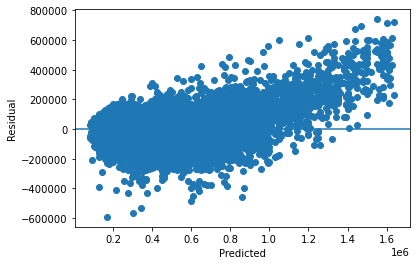

In [147]:
plt.scatter(df_z_loc2['price'],model.resid)
plt.axhline(0)
plt.xlabel('Predicted')
plt.ylabel('Residual')


In [148]:
# Start figuring out which column is creating a lack of homoskedacity
# It's not the zipcodes

In [149]:
model_summary(df_z_loc2, X_z_zip, 'price', False)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     1121.
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        07:32:07   Log-Likelihood:            -2.4146e+05
No. Observations:               18739   AIC:                         4.831e+05
Df Residuals:                   18654   BIC:                         4.837e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           3.404e+05   5299.557     64.227      0.000     3.3e+05    3.51e+05
bedrooms           -5367.3349    992.890     -5.406      0.000   -7313.490   -3421.180
bathrooms           1.508e+04   1395.856     10.807      0.000    1.23e+04    1.78e+04
sqft_living         1.327e+05   2019.295     65.713      0.000    1.29e+05    1.37e+05
sqft_lot            6184.6325   3631.333      1.703      0.089    -933.110    1.33e+04
floors              1540.9693   1228.166      1.255      0.210    -866.349    3948.287
waterfront          3.078e+05   4.38e+04      7.034      0.000    2.22e+05    3.94e+05
view                2.775e+04   1363.292     20.354      0.000    2.51e+04    3.04e+04
condition           1.543e+04    803.238     19.208      0.000    1.39e+04     1.7e+04
grade               6.133e+04   1424.927     43.039      0.000    5.85e+04    6.41e+04
yr_built           -1.194e+04   1329.624     -8.982      0.000   -1.45e+04   -9336.465
basementyes        -1.929e+04   1922.780    -10.032      0.000   -2.31e+04   -1.55e+04
living_vs_neighbor -1.735e+04   1221.671    -14.201      0.000   -1.97e+04    -1.5e+04
lot_vs_neighbor     1.181e+04   2856.085      4.135      0.000    6211.580    1.74e+04
live_lot           -1.762e+04   1671.772    -10.542      0.000   -2.09e+04   -1.43e+04
renovated_yes       3.911e+04   4344.075      9.003      0.000    3.06e+04    4.76e+04
zipcode_98002       2.141e+04   8742.800      2.449      0.014    4274.535    3.85e+04
zipcode_98003      -7350.8214   7814.785     -0.941      0.347   -2.27e+04    7966.870
zipcode_98004       6.141e+05   8463.989     72.550      0.000    5.97e+05    6.31e+05
zipcode_98005       3.189e+05   9514.430     33.521      0.000       3e+05    3.38e+05
zipcode_98006       2.589e+05   7245.835     35.734      0.000    2.45e+05    2.73e+05
zipcode_98007        2.52e+05   9793.896     25.729      0.000    2.33e+05    2.71e+05
zipcode_98008       2.366e+05   7958.219     29.729      0.000    2.21e+05    2.52e+05
zipcode_98010       8.249e+04   1.21e+04      6.816      0.000    5.88e+04    1.06e+05
zipcode_98011       1.384e+05   8717.708     15.872      0.000    1.21e+05    1.55e+05
zipcode_98014       1.048e+05    1.2e+04      8.736      0.000    8.13e+04    1.28e+05
zipcode_98019       8.613e+04   9082.213      9.483      0.000    6.83e+04    1.04e+05
zipcode_98022       2277.7097   9018.420      0.253      0.801   -1.54e+04       2e+04
zipcode_98023      -2.464e+04   6786.250     -3.631      0.000   -3.79e+04   -1.13e+04
zipcode_98024       1.423e+05   1.52e+04      9.337      0.000    1.12e+05    1.72e+05
zipcode_98027       1.856e+05   7554.539     24.566      0.000    1.71e+05       2e+05
zipcode_98028       1.284e+05   7816.691     16.427      0.000    1.13e+05    1.44e+05
zipcode_98029       2.227e+05   7674.4

Text(0, 0.5, 'Residual')

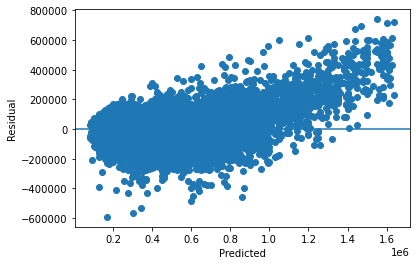

In [150]:
plt.scatter(df_z_loc2['price'],model.resid)
plt.axhline(0)
plt.xlabel('Predicted')
plt.ylabel('Residual')


In [151]:
X_test_start = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'yr_built', 'basementyes', 'living_vs_neighbor',
       'lot_vs_neighbor', 'live_lot', 'renovated_yes']

In [152]:
model_summary(df_z_loc2, X_test_start, 'price', False)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     1871.
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        07:32:07   Log-Likelihood:            -2.4973e+05
No. Observations:               18739   AIC:                         4.995e+05
Df Residuals:                   18723   BIC:                         4.996e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           5.177e+05   1807.958    286.350      0.000    5.14e+05    5.21e+05
bedrooms           -1.255e+04   1516.726     -8.276      0.000   -1.55e+04   -9580.183
bathrooms           1.994e+04   2152.781      9.263      0.000    1.57e+04    2.42e+04
sqft_living         1.306e+05   2942.874     44.393      0.000    1.25e+05    1.36e+05
sqft_lot            1.829e+04   5220.702      3.503      0.000    8053.006    2.85e+04
floors              1935.9317   1878.107      1.031      0.303   -1745.328    5617.191
waterfront          2.451e+05   6.67e+04      3.674      0.000    1.14e+05    3.76e+05
view                 2.22e+04   2066.439     10.744      0.000    1.82e+04    2.63e+04
condition             1.5e+04   1202.370     12.475      0.000    1.26e+04    1.74e+04
grade               1.201e+05   2049.888     58.606      0.000    1.16e+05    1.24e+05
yr_built            -9.17e+04   1576.106    -58.180      0.000   -9.48e+04   -8.86e+04
basementyes         7422.0437   2895.519      2.563      0.010    1746.565    1.31e+04
living_vs_neighbor -4.102e+04   1806.779    -22.701      0.000   -4.46e+04   -3.75e+04
lot_vs_neighbor     2.073e+04   4362.564      4.753      0.000    1.22e+04    2.93e+04
live_lot            5.104e+04   2217.105     23.019      0.000    4.67e+04    5.54e+04
renovated_yes       2.754e+04   6690.630      4.116      0.000    1.44e+04    4.07e+04
==============================================================================
Omnibus:                     3576.521   Durbin-Watson:                   1.559
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12035.442
Skew:                           0.957   Prob(JB):                         0.00
Kurtosis:                       6.428   Cond. No.                         110.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Residual')

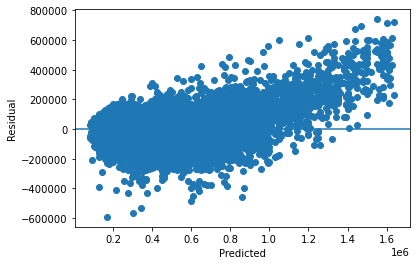

In [153]:
plt.scatter(df_z_loc2['price'],model.resid)
plt.axhline(0)
plt.xlabel('Predicted')
plt.ylabel('Residual')

bedrooms-----------------
Figure(864x576)
----------------------
bathrooms-----------------
Figure(864x576)
----------------------
sqft_living-----------------
Figure(864x576)
----------------------
sqft_lot-----------------
Figure(864x576)
----------------------
floors-----------------
Figure(864x576)
----------------------
waterfront-----------------
Figure(864x576)
----------------------
view-----------------
Figure(864x576)
----------------------
condition-----------------
Figure(864x576)
----------------------
grade-----------------
Figure(864x576)
----------------------
yr_built-----------------
Figure(864x576)
----------------------
basementyes-----------------
Figure(864x576)
----------------------
living_vs_neighbor-----------------
Figure(864x576)
----------------------
lot_vs_neighbor-----------------
Figure(864x576)
----------------------
live_lot-----------------
Figure(864x576)
----------------------
renovated_yes-----------------
Figure(864x576)
----------------------


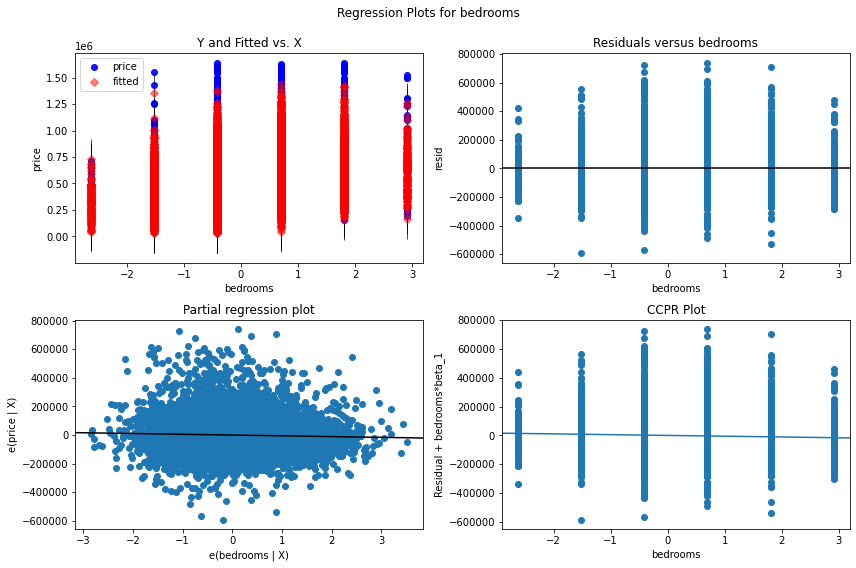

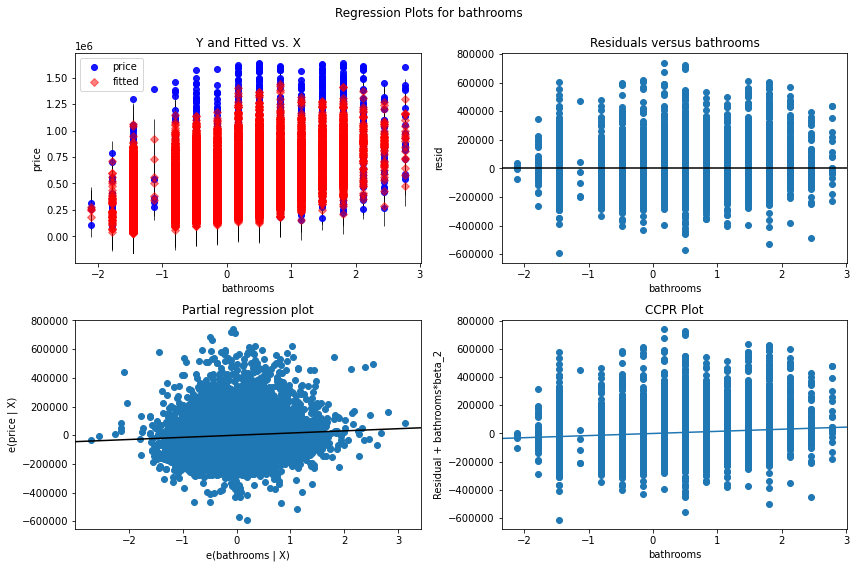

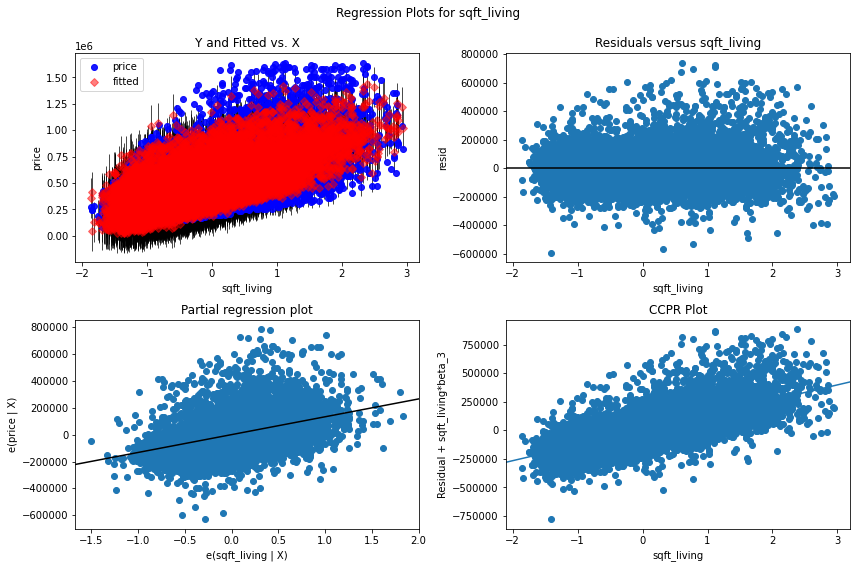

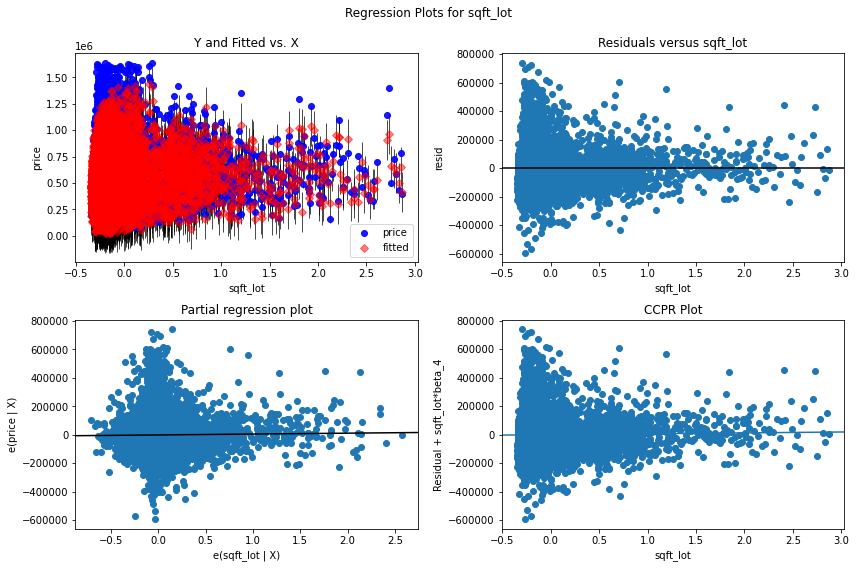

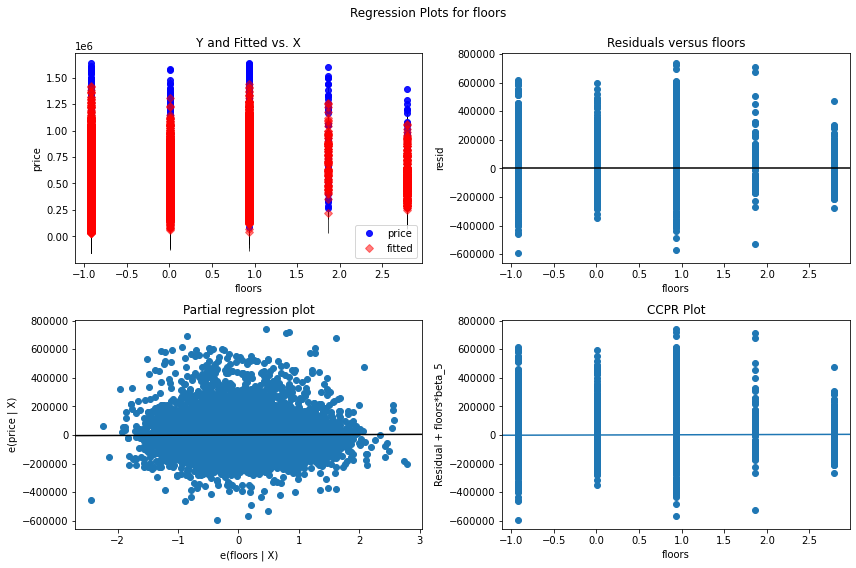

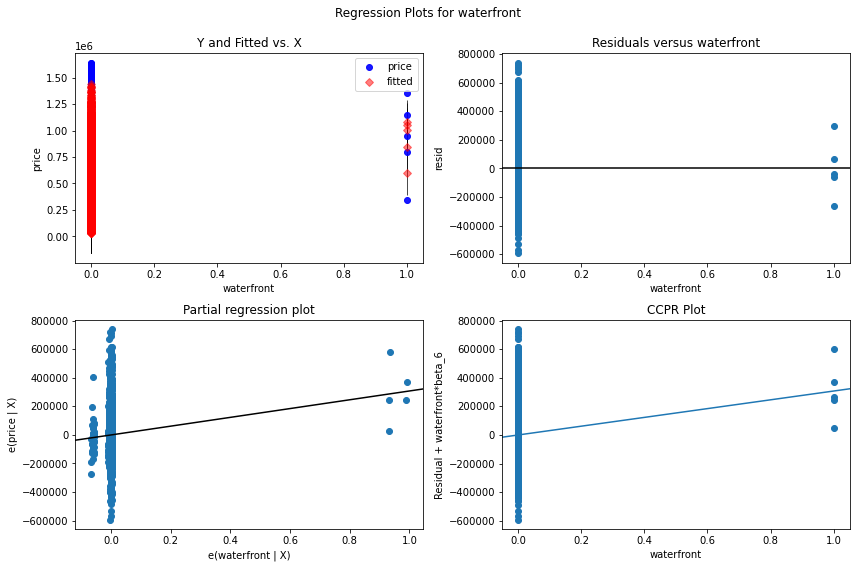

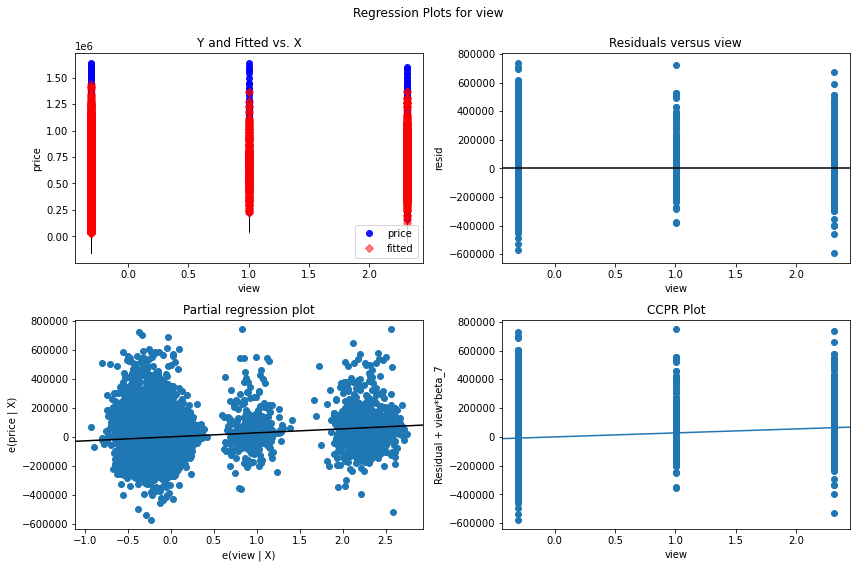

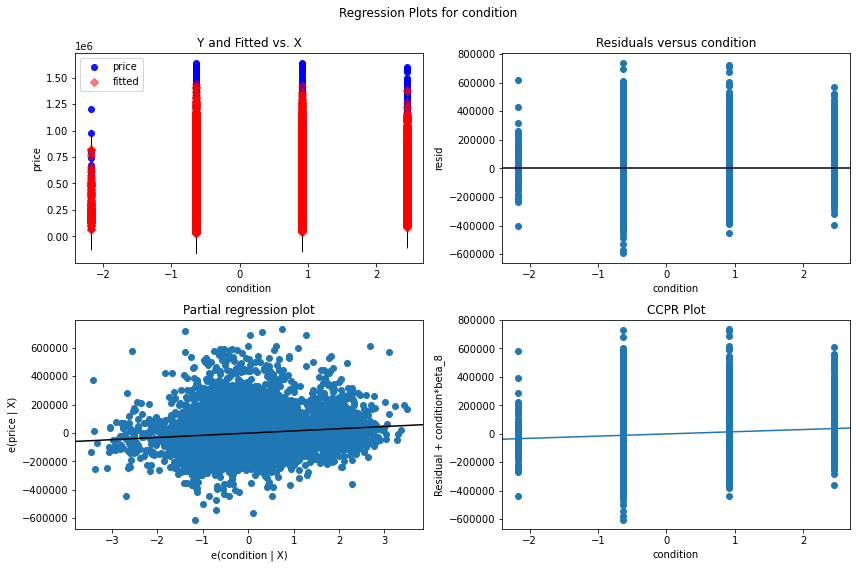

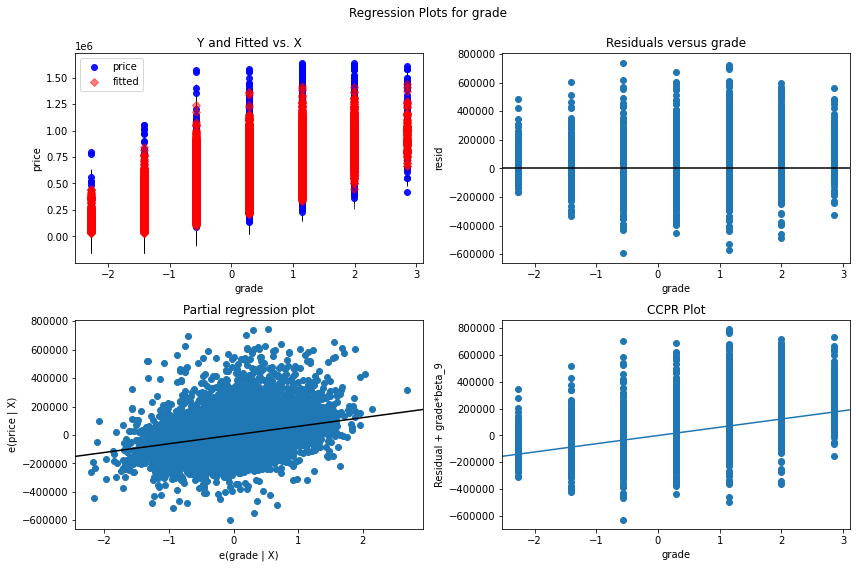

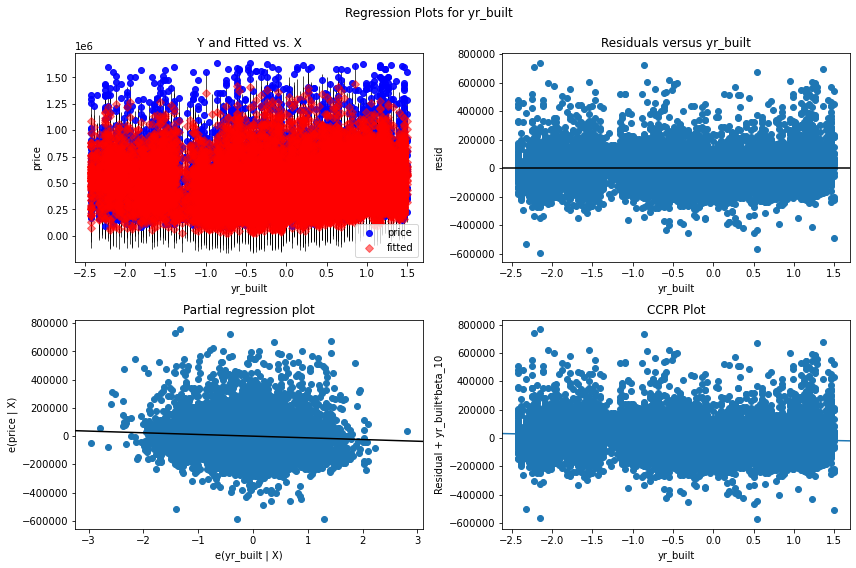

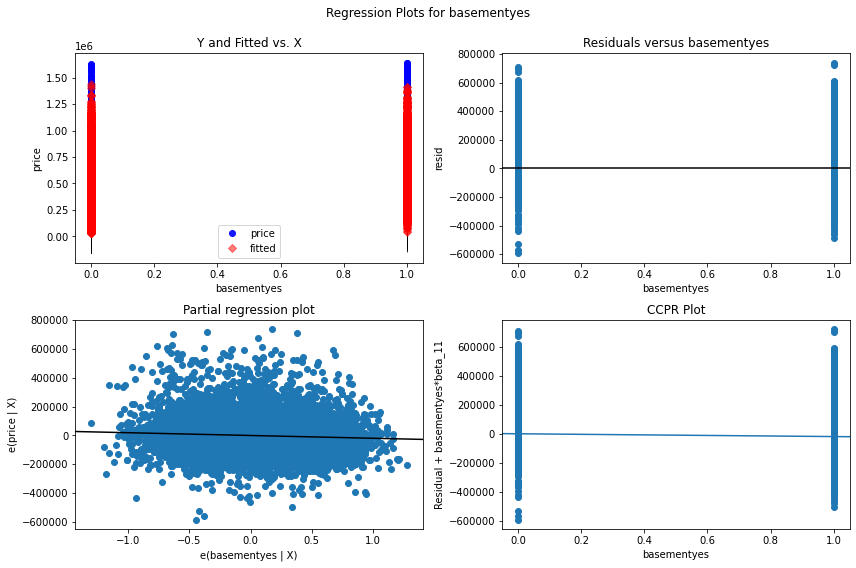

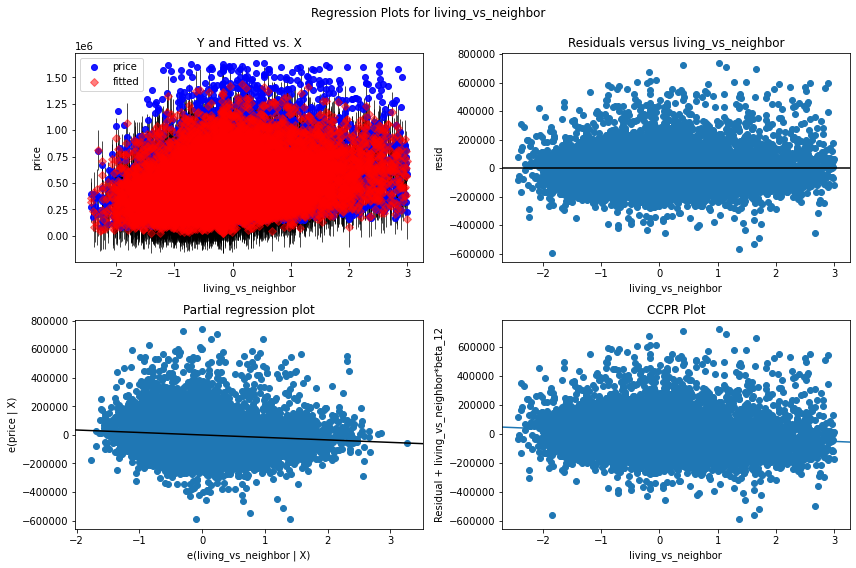

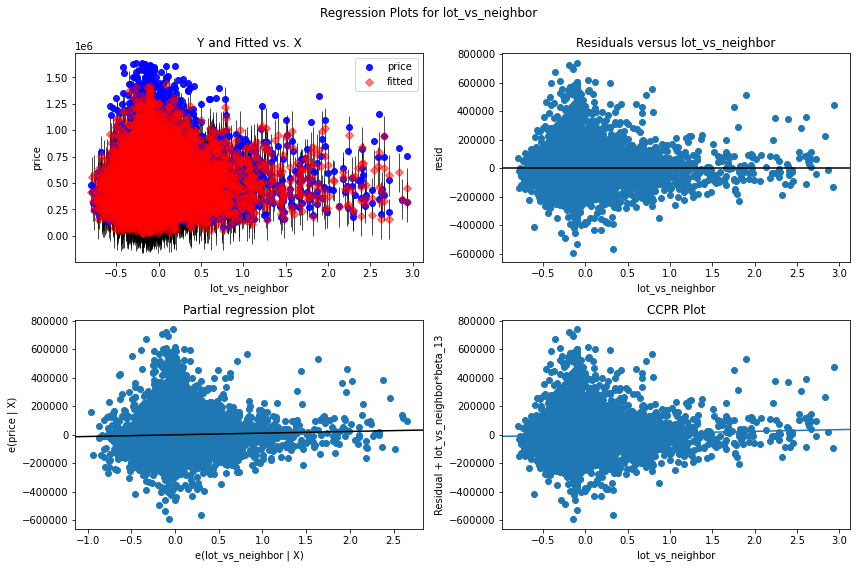

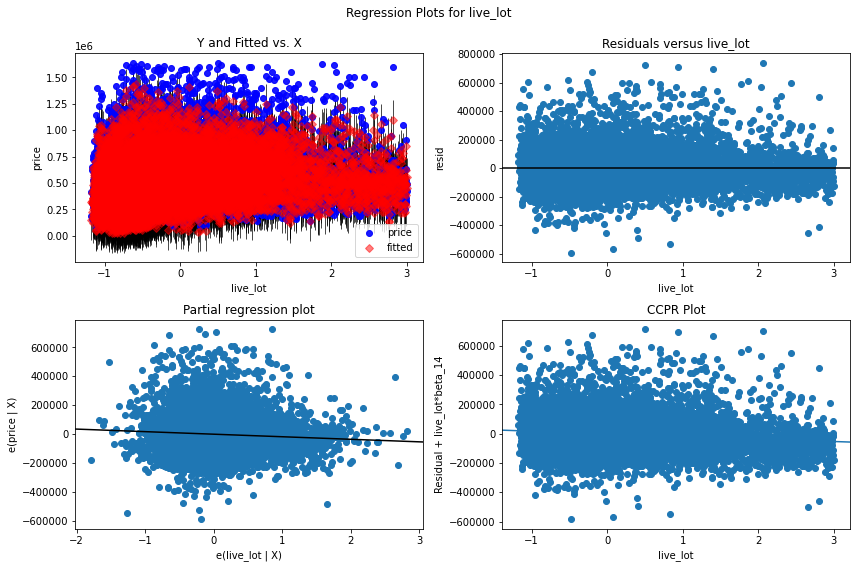

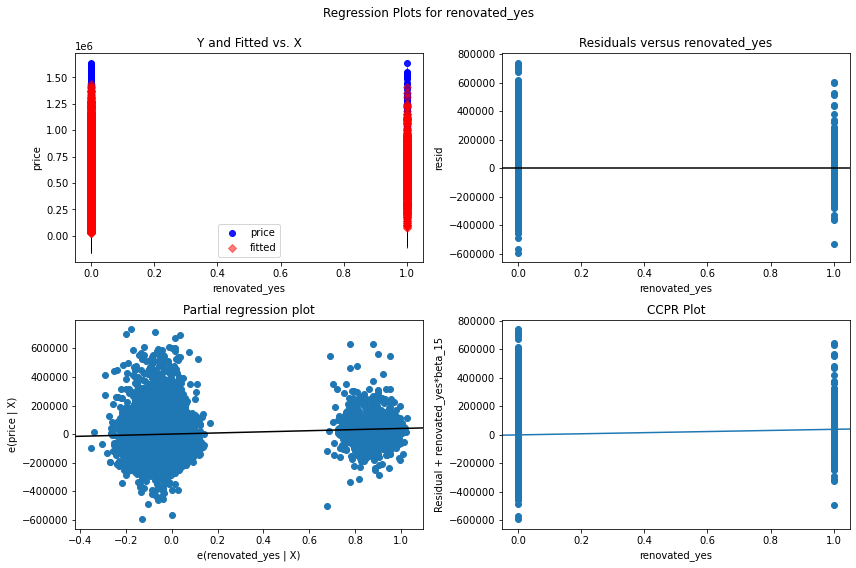

In [154]:
for col in X_test_start:
    print(f'{col}-----------------')
    print(sm.graphics.plot_regress_exog(model, col,plt.figure(figsize=(12,8))));
    print('----------------------')

In [155]:
# Sqft Lot, # Waterfront # Lot_vs_neighbor are heteroskedecatic

In [156]:
X_z_zip_ho = ['bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'view', 'condition', 'grade',
       'yr_built', 'basementyes', 'living_vs_neighbor',
       'live_lot', 'renovated_yes', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102',
       'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
       'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119',
       'zipcode_98122', 'zipcode_98125', 'zipcode_98126', 'zipcode_98133',
       'zipcode_98136', 'zipcode_98144', 'zipcode_98146', 'zipcode_98148',
       'zipcode_98155', 'zipcode_98166', 'zipcode_98168', 'zipcode_98177',
       'zipcode_98178', 'zipcode_98188', 'zipcode_98198', 'zipcode_98199']

In [157]:
model_summary(df_z_loc2, X_z_zip_ho, 'price', False)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     1157.
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        07:32:27   Log-Likelihood:            -2.4149e+05
No. Observations:               18739   AIC:                         4.832e+05
Df Residuals:                   18657   BIC:                         4.838e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            3.39e+05   5290.473     64.072      0.000    3.29e+05    3.49e+05
bedrooms           -5604.6609    993.553     -5.641      0.000   -7552.115   -3657.207
bathrooms           1.515e+04   1398.201     10.834      0.000    1.24e+04    1.79e+04
sqft_living         1.333e+05   1999.474     66.686      0.000    1.29e+05    1.37e+05
floors              2280.4429   1220.855      1.868      0.062    -112.545    4673.431
view                 2.85e+04   1362.818     20.910      0.000    2.58e+04    3.12e+04
condition           1.543e+04    803.302     19.212      0.000    1.39e+04     1.7e+04
grade               6.135e+04   1426.465     43.007      0.000    5.86e+04    6.41e+04
yr_built           -1.179e+04   1329.744     -8.870      0.000   -1.44e+04   -9188.148
basementyes        -1.851e+04   1917.145     -9.657      0.000   -2.23e+04   -1.48e+04
living_vs_neighbor -1.671e+04   1217.220    -13.727      0.000   -1.91e+04   -1.43e+04
live_lot           -2.091e+04   1479.084    -14.136      0.000   -2.38e+04    -1.8e+04
renovated_yes       3.944e+04   4348.926      9.069      0.000    3.09e+04     4.8e+04
zipcode_98002       2.059e+04   8757.703      2.351      0.019    3419.188    3.78e+04
zipcode_98003      -8303.1327   7827.304     -1.061      0.289   -2.36e+04    7039.097
zipcode_98004       6.128e+05   8477.336     72.283      0.000    5.96e+05    6.29e+05
zipcode_98005       3.187e+05   9529.596     33.445      0.000       3e+05    3.37e+05
zipcode_98006        2.58e+05   7254.903     35.557      0.000    2.44e+05    2.72e+05
zipcode_98007       2.511e+05   9810.759     25.597      0.000    2.32e+05     2.7e+05
zipcode_98008       2.356e+05   7971.268     29.551      0.000     2.2e+05    2.51e+05
zipcode_98010       8.191e+04   1.21e+04      6.766      0.000    5.82e+04    1.06e+05
zipcode_98011       1.375e+05   8731.004     15.748      0.000     1.2e+05    1.55e+05
zipcode_98014       1.053e+05    1.2e+04      8.795      0.000    8.19e+04    1.29e+05
zipcode_98019       8.556e+04   9099.253      9.403      0.000    6.77e+04    1.03e+05
zipcode_98022       1863.3297   9031.736      0.206      0.837   -1.58e+04    1.96e+04
zipcode_98023      -2.576e+04   6793.983     -3.791      0.000   -3.91e+04   -1.24e+04
zipcode_98024       1.443e+05   1.52e+04      9.491      0.000    1.15e+05    1.74e+05
zipcode_98027       1.867e+05   7537.445     24.775      0.000    1.72e+05    2.02e+05
zipcode_98028       1.283e+05   7831.062     16.383      0.000    1.13e+05    1.44e+05
zipcode_98029       2.233e+05   7685.936     29.059      0.000    2.08e+05    2.38e+05
zipcode_98030        687.5215   8030.701      0.086      0.932   -1.51e+04    1.64e+04
zipcode_98031       6714.6456   7888.249      0.851      0.395   -8747.041    2.22e+04
zipcode_98032      -3051.8844   1.02e+

Text(0, 0.5, 'Residual')

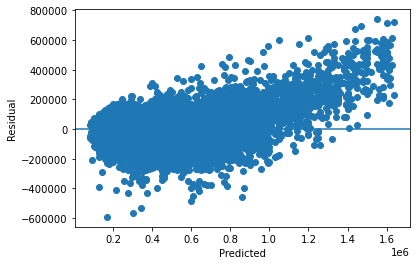

In [158]:
plt.scatter(df_z_loc2['price'],model.resid)
plt.axhline(0)
plt.xlabel('Predicted')
plt.ylabel('Residual')

In [159]:
# Now we can fit a LinearRegression object to our training data!

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

# Now we can fit a LinearRegression object to our training data!

lr = LinearRegression()
lr.fit(df_z_loc2[X_z_zip], df_z_loc2['price'])
# We can use the .coef_ attribute to recover the results
# of the regression.

lr.score(df_z_loc2[X_z_zip], df_z_loc2['price'])

0.8346314555738519

In [160]:
y_hat = lr.predict(df_z_loc2[X_z_zip])
y_hat

array([ 213534.81027668,  563513.43311927,  232508.26738597, ...,
        898261.31246049, 1083295.79454283,  801577.33879768])

In [161]:
y_hat = lr.predict(df_z_loc2[X_z_zip])
resid = (df_z_loc2['price'] - y_hat)
resid

0         8365.18972
1       -25513.43312
2       -52508.26739
3        59155.90597
4        19607.18629
            ...     
18734   111690.41141
18735   217717.47918
18736   191738.68754
18737   496704.20546
18738   208422.66120
Name: price, Length: 18739, dtype: float64

Text(0, 0.5, 'Residual')

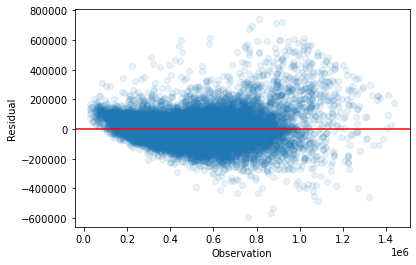

In [162]:
plt.scatter(x=y_hat,y=resid, alpha=0.1)
plt.axhline(0, color='red')
plt.xlabel('Observation')
plt.ylabel('Residual')

In [163]:
resid

0         8365.18972
1       -25513.43312
2       -52508.26739
3        59155.90597
4        19607.18629
            ...     
18734   111690.41141
18735   217717.47918
18736   191738.68754
18737   496704.20546
18738   208422.66120
Name: price, Length: 18739, dtype: float64

In [164]:
df_z_loc2[X_z_zip]

bedrooms  bathrooms  sqft_living  sqft_lot   floors  waterfront  \
0      -0.41185   -1.45459     -0.98204  -0.22816 -0.91774     0.00000   
1      -0.41185    0.17194      0.53098  -0.18985  0.93402     0.00000   
2      -1.51952   -1.45459     -1.42833  -0.12349 -0.91774     0.00000   
3       0.69582    1.14785     -0.13301  -0.24380 -0.91774     0.00000   
4      -0.41185   -0.15337     -0.43779  -0.16969 -0.91774     0.00000   
...         ...        ...          ...       ...      ...         ...   
18734   0.69582    1.47316      1.66302  -0.26786  0.93402     0.00000   
18735   1.80349    2.77438      2.09842  -0.16555  0.93402     0.00000   
18736   1.80349    2.12377      2.27258  -0.16819  0.93402     0.00000   
18737   0.69582    1.47316      1.44532  -0.12048  0.93402     0.00000   
18738   0.69582    1.79846      1.55417  -0.19086  0.93402     0.00000   

          view  condition    grade  yr_built  basementyes  living_vs_neighbor  \
0     -0.30530   -0.63136 -0.56451  -0.54875            0            -0.53992   
1     -0.30530   -0.63136 -0.56451  -0.68492            1             1.45891   
2     -0.30530   -0.63136 -1.41822  -1.29771            0            -2.40571   
3     -0.30530    2.44799 -0.56451  -0.20831            1             1.21055   
4     -0.30530   -0.63136  0.28920   0.54065            0            -0.37525   
...        ...        ...      ...       ...          ...                 ...   
18734 -0.30530   -0.63136  1.14291   1.22152            1             2.40357   
18735 -0.30530   -0.63136  1.99662   1.49387            0             0.42595   
18736  2.31279   -0.63136  1.99662   1.18748            0             1.00777   
18737 -0.30530   -0.63136  1.99662   1.22152            0             1.36015   
18738 -0.30530   -0.63136  1.14291   1.28961            1             2.05684   

       lot_vs_neighbor  live_lot  renovated_yes  zipcode_98002  zipcode_98003  \
0             -0.10418  -0.42942              0        0.00000        0.00000   
1             -0.14459   0.11312              1        0.00000        0.00000   
2              0.08271  -0.91929              0        0.00000        0.00000   
3             -0.10418   0.25105              0        0.00000        0.00000   
4             -0.04439  -0.43287              0        0.00000        0.00000   
...                ...       ...            ...            ...            ...   
18734         -0.10418   2.14776              0        0.00000        0.00000   
18735         -0.10418   0.60009              0        0.00000        0.00000   
18736         -0.08840   0.69749              0        0.00000        0.00000   
18737         -0.10418   0.04593              0        0.00000        0.00000   
18738          0.02122   0.60587              0        0.00000        0.00000   

       zipcode_98004  zipcode_98005  zipcode_98006  zipcode_98007  \
0            0.00000        0.00000        0.00000        0.00000   
1            0.00000        0.00000        0.00000        0.00000   
2            0.00000        0.00000        0.00000        0.00000   
3            0.00000        0.00000        0.00000        0.00000   
4            0.00000        0.00000        0.00000        0.00000   
...              ...            ...            ...            ...   
18734        0.00000        0.00000        0.00000        0.00000   
18735        0.00000        0.00000        0.00000        0.00000   
18736        0.00000        0.00000        0.00000        0.00000   
18737        0.00000        0.00000        0.00000        0.00000   
18738        0.00000        0.00000        0.00000        0.00000   

       zipcode_98008  zipcode_98010  zipcode_98011  zipcode_98014  \
0            0.00000        0.00000        0.00000        0.00000   
1            0.00000        0.00000        0.00000        0.00000   
2            0.00000        0.00000        0.00000        0.00000   
3            0.00000        0.00000        0.00000        0.00000  

/Users/ethankunin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

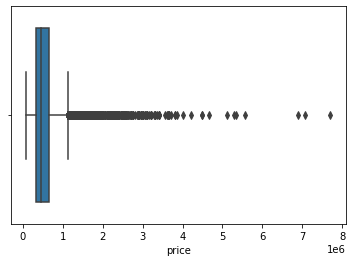

In [165]:
sns.boxplot(df['price'])

/Users/ethankunin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

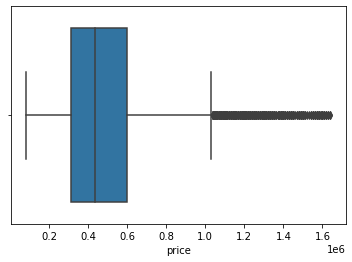

In [166]:
sns.boxplot(df_z_loc2['price'])

/Users/ethankunin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

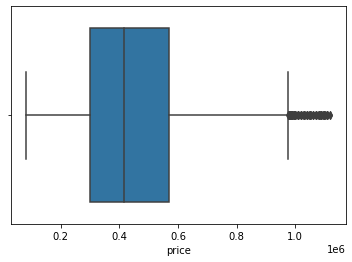

In [167]:
sns.boxplot(df_iqr3['price'])

## Going back to Z-Score because of heteroskedecacity unable to be met

In [168]:
df_iqr4 = df_iqr.copy()

In [169]:
df_iqr4.drop('yr_renovated', axis=1, inplace=True)

In [170]:
res=df_iqr4['price'].describe()
thresh = res['75%'] -res['25%']
u_bound=res['75%']+1.5*thresh
u_bound
l_bound=res['25%']-1.5*thresh


In [171]:
df_iqr4['outlier'] = (df_iqr4['price']>u_bound).map({True:True,
                                False:False})

In [172]:
df_iqror=df_iqr4.loc[df_iqr4['outlier']==False]

Text(0.5, 1.0, 'Outliers Not Removed')

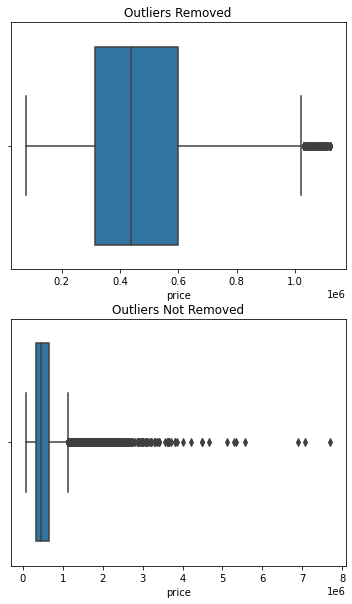

In [173]:
# Add number of removed values
fig, axes = plt.subplots(nrows=2, figsize=(6,10))
sns.boxplot(data=df_iqror, x='price', ax=axes[0])
axes[0].set_title('Outliers Removed')
sns.boxplot(data=df_iqr4, x='price', ax=axes[1])
axes[1].set_title('Outliers Not Removed')

## Baseline Model Price Removal

In [174]:
df_iqror.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'basementyes', 'total_rooms', 'living_vs_neighbor',
       'lot_vs_neighbor', 'live_lot', 'renovated_yes', 'outlier'],
      dtype='object')

In [175]:
df_iqror.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20235 entries, 0 to 21590
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  20235 non-null  int64         
 1   date                20235 non-null  datetime64[ns]
 2   price               20235 non-null  float64       
 3   bedrooms            20235 non-null  int64         
 4   bathrooms           20235 non-null  float64       
 5   sqft_living         20235 non-null  int64         
 6   sqft_lot            20235 non-null  int64         
 7   floors              20235 non-null  float64       
 8   waterfront          20235 non-null  float64       
 9   view                20235 non-null  float64       
 10  condition           20235 non-null  int64         
 11  grade               20235 non-null  int64         
 12  sqft_above          20235 non-null  int64         
 13  yr_built            20235 non-null  int64     

In [176]:
X_targs3= ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'sqft_living15',
       'sqft_lot15', 'basementyes', 'total_rooms', 'living_vs_neighbor',
       'lot_vs_neighbor', 'live_lot', 'renovated_yes']

In [177]:
model_summary(df_iqror, X_targs3, 'price', False)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     1650.
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        07:32:28   Log-Likelihood:            -2.6721e+05
No. Observations:               20235   AIC:                         5.345e+05
Df Residuals:                   20216   BIC:                         5.346e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4.641e+06   9.01e+04     51.477      0.000    4.46e+06    4.82e+06
bedrooms           -1.518e+04   1307.016    -11.611      0.000   -1.77e+04   -1.26e+04
bathrooms           1.726e+04   1680.760     10.267      0.000     1.4e+04    2.06e+04
sqft_living           18.0500      6.559      2.752      0.006       5.195      30.905
sqft_lot               0.1828      0.042      4.318      0.000       0.100       0.266
floors              9543.2547   2971.880      3.211      0.001    3718.128    1.54e+04
waterfront          1.064e+05   1.94e+04      5.477      0.000    6.84e+04    1.45e+05
view                1.969e+04   1581.452     12.451      0.000    1.66e+04    2.28e+04
condition           2.028e+04   1580.586     12.829      0.000    1.72e+04    2.34e+04
grade               8.524e+04   1484.798     57.407      0.000    8.23e+04    8.81e+04
sqft_above            22.7749      4.884      4.664      0.000      13.203      32.347
yr_built           -2671.6543     46.044    -58.024      0.000   -2761.904   -2581.405
sqft_living15         98.6443      5.921     16.661      0.000      87.040     110.249
sqft_lot15            -0.0332      0.058     -0.569      0.569      -0.148       0.081
basementyes         2.261e+04   3607.789      6.268      0.000    1.55e+04    2.97e+04
total_rooms         2080.6236    813.917      2.556      0.011     485.281    3675.966
living_vs_neighbor  5.649e+04   9631.008      5.865      0.000    3.76e+04    7.54e+04
lot_vs_neighbor     1205.8533    972.539      1.240      0.215    -700.402    3112.108
live_lot            1.303e+05   5143.650     25.340      0.000     1.2e+05     1.4e+05
renovated_yes       1.462e+04   5644.400      2.590      0.010    3555.434    2.57e+04
==============================================================================
Omnibus:                      778.476   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1083.519
Skew:                           0.392   Prob(JB):                    5.21e-236
Kurtosis:                       3.818   Cond. No.                     4.30e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.63e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [178]:
lr = LinearRegression()
lr.fit(df_iqror[X_targs3], df_iqror['price'])

y_hat = lr.predict(df_iqror[X_targs3])
y_hat

y_hat = lr.predict(df_iqror[X_targs3])
resid = (df_iqror['price'] - y_hat)
resid

0       -101992.07208
1         -5043.18970
2       -199983.92046
3        149543.57100
4         97902.89287
             ...     
21453    330947.60818
21461    308329.33333
21532    211800.38667
21577    214026.02679
21590    364306.12932
Name: price, Length: 20235, dtype: float64

Text(0, 0.5, 'Residual')

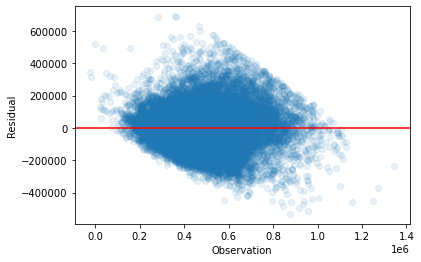

In [179]:
plt.scatter(x=y_hat,y=resid, alpha=0.1)
plt.axhline(0, color='red')
plt.xlabel('Observation')
plt.ylabel('Residual')

In [46]:
def sked_show(df, X_cols, val='price'):
    lr = LinearRegression()
    lr.fit(df[X_cols], df[val])

    y_hat = lr.predict(df[X_cols])


    y_hat = lr.predict(df[X_cols])
    resid = (df[val] - y_hat)
    fig, ax= plt.subplots(figsize=(5,5))
    ax.scatter(x=y_hat,y=resid, alpha=0.1)
    ax.axhline(0, color='red')
    ax.set_xlabel('Price')
    ax.set_ylabel('Residual')
    return fig,ax

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

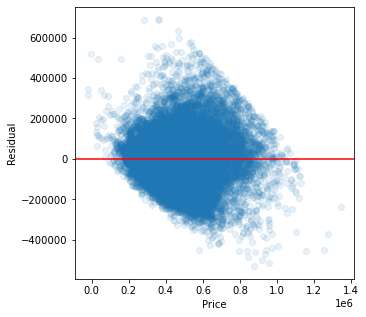

In [181]:
sked_show(df_iqror, X_targs3)

## Check for Multicolinearity

In [182]:

df_iqror.corr()['price'].round(2).sort_values(ascending=False)

price                 1.00000
grade                 0.63000
sqft_living           0.62000
sqft_living15         0.56000
sqft_above            0.53000
bathrooms             0.45000
lat                   0.43000
total_rooms           0.42000
bedrooms              0.30000
floors                0.27000
living_vs_neighbor    0.24000
view                  0.23000
live_lot              0.17000
basementyes           0.16000
sqft_lot              0.09000
renovated_yes         0.08000
sqft_lot15            0.08000
long                  0.07000
yr_built              0.06000
waterfront            0.05000
lot_vs_neighbor       0.04000
condition             0.03000
id                    0.01000
zipcode              -0.02000
outlier                   nan
Name: price, dtype: float64

<AxesSubplot:>

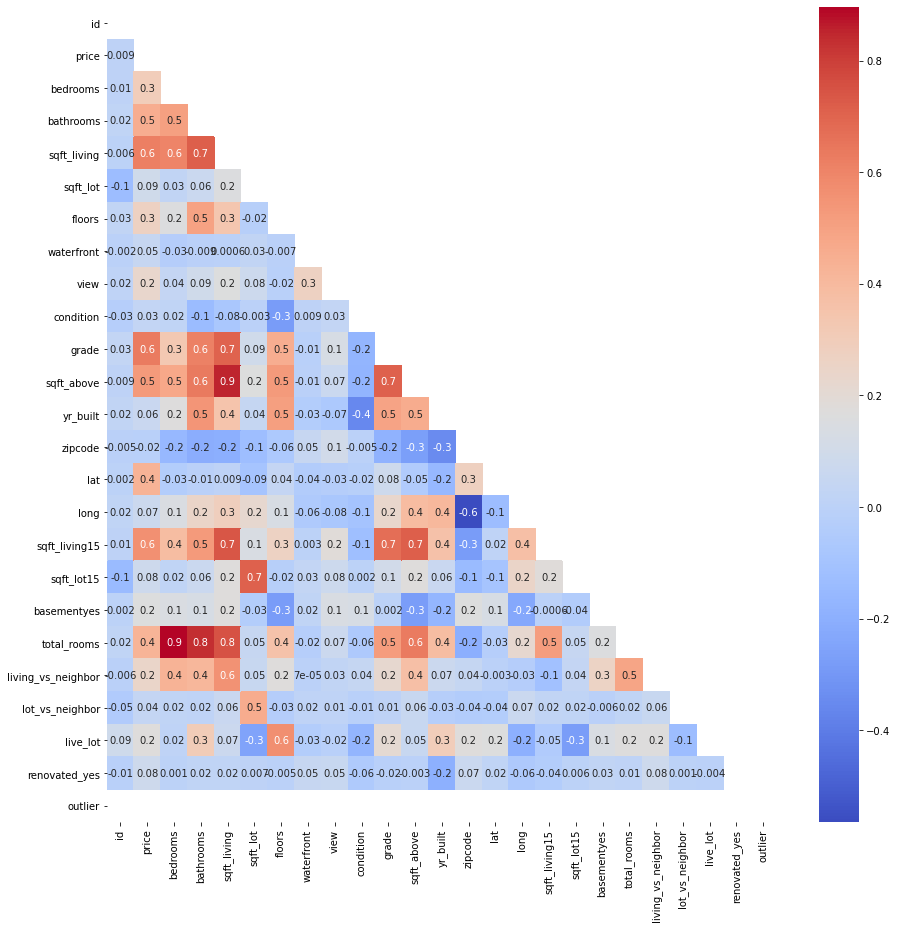

In [183]:
corr2 = df_iqror.corr()

fig, ax = plt.subplots(figsize=(15,15))
matrix = np.triu(corr2)
sns.heatmap(corr2,cmap="coolwarm", annot=True, fmt='.1g', mask=matrix)

In [184]:
# Remove total_rooms, sqft_above

corr_finder(df_iqror)

cc
pairs                             
(bedrooms, total_rooms)    0.89690
(sqft_living, sqft_above)  0.85335
(bathrooms, total_rooms)   0.83498
(sqft_living, total_rooms) 0.75134

In [185]:
corr_finder(df_iqror.drop(['total_rooms', 'sqft_above'], axis=1))

Empty DataFrame
Columns: [cc]
Index: []

In [186]:
df_iqror_mc = df_iqror.drop(['total_rooms', 'sqft_above'], axis=1)

## Conclusion

In [187]:
df_iqror_mc.columns
x_targs = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'basementyes', 'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot',
       'renovated_yes']

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  price   R-squared:                       0.704
 Model:                            OLS   Adj. R-squared:                  0.703
 Method:                 Least Squares   F-statistic:                     2399.
 Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
 Time:                        07:32:29   Log-Likelihood:            -2.6405e+05
 No. Observations:               20235   AIC:                         5.281e+05
 Df Residuals:                   20214   BIC:                         5.283e+05
 Df Model:                          20                                         
 Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------

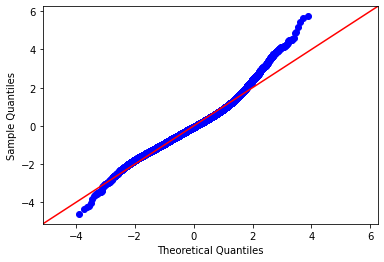

In [188]:
 model_summary(df_iqror_mc, x_targs, 'price', True)

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

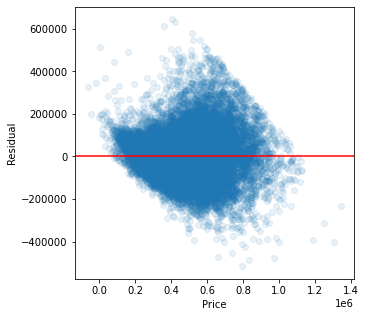

In [189]:
sked_show(df_iqror_mc, x_targs)

## Check for linearity

<bound method Figure.tight_layout of <Figure size 2160x1800 with 20 Axes>>

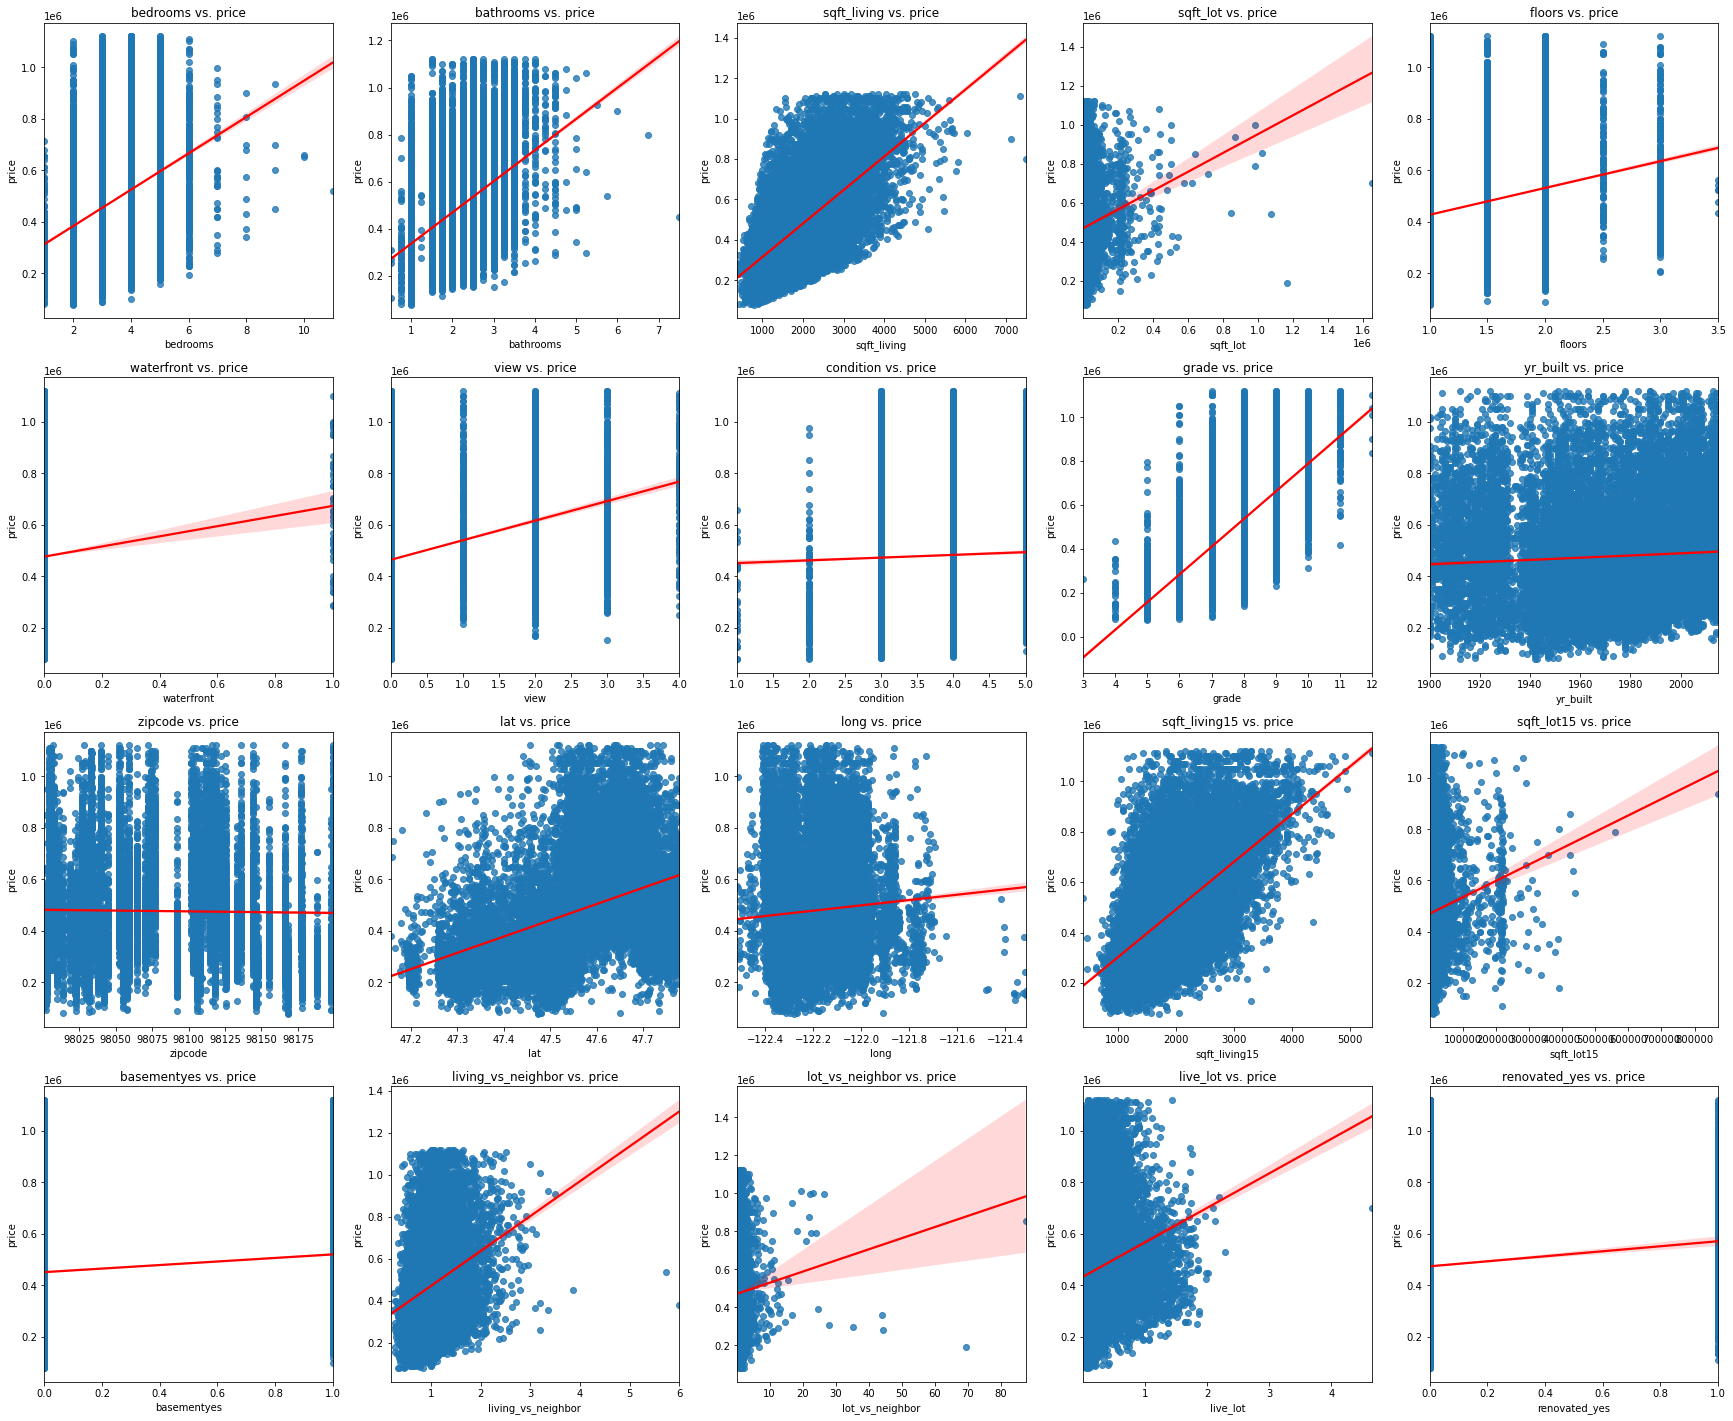

In [190]:
# Commented out for speed
# yr_built, sqft_lot do not have linear relationships

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(30,25))
for ax, col in zip(axes.flatten(), x_targs):
    sns.regplot(data=df_iqror_mc, x=col, y='price', ax=ax, line_kws={'color': 'red'})
    ax.set_title(f'{col} vs. price')
fig.tight_layout

In [191]:
df_iqr_nocl = df_iqror_mc.drop(['yr_built', 'sqft_lot'], axis=1)

In [192]:
df_iqr_nocl.columns
x_targs = ['bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'basementyes', 'living_vs_neighbor',
       'lot_vs_neighbor', 'live_lot', 'renovated_yes']

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  price   R-squared:                       0.674
 Model:                            OLS   Adj. R-squared:                  0.674
 Method:                 Least Squares   F-statistic:                     2324.
 Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
 Time:                        07:33:36   Log-Likelihood:            -2.6501e+05
 No. Observations:               20235   AIC:                         5.301e+05
 Df Residuals:                   20216   BIC:                         5.302e+05
 Df Model:                          18                                         
 Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------

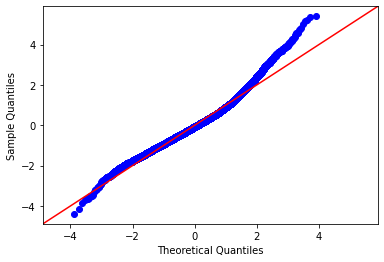

In [193]:
model_summary(df_iqr_nocl, x_targs, 'price', True)

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

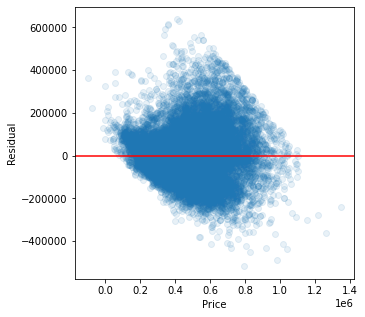

In [194]:
sked_show(df_iqr_nocl, x_targs)

In [195]:
# OHE: Floors/condition
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
encoder

cat_cols=['zipcode']

encoder.fit(df_iqr_nocl[cat_cols])

ohe_vars = encoder.transform(df_iqr_nocl[cat_cols])
encoder.get_feature_names(cat_cols)
cat_vars = pd.DataFrame(ohe_vars,columns=encoder.get_feature_names(cat_cols))

In [196]:
df_iqr_nocl = df_iqr_nocl.reset_index()

In [197]:
df_iqr_zip = pd.concat([df_iqr_nocl,cat_vars], axis=1)

In [198]:
df_iqr_zip

index          id       date         price  bedrooms  bathrooms  \
0          0  7129300520 2014-10-13  221900.00000         3    1.00000   
1          1  6414100192 2014-12-09  538000.00000         3    2.25000   
2          2  5631500400 2015-02-25  180000.00000         2    1.00000   
3          3  2487200875 2014-12-09  604000.00000         4    3.00000   
4          4  1954400510 2015-02-18  510000.00000         3    2.00000   
...      ...         ...        ...           ...       ...        ...   
20230  21453  1245002281 2014-05-12 1050000.00000         4    3.75000   
20231  21461  7010700308 2014-11-12 1010000.00000         4    3.25000   
20232  21532  8835770330 2014-08-19 1060000.00000         2    1.50000   
20233  21577  8672200110 2015-03-17 1090000.00000         5    3.75000   
20234  21590  7936000429 2015-03-26 1010000.00000         4    3.50000   

       sqft_living  floors  waterfront    view  condition  grade  zipcode  \
0             1180 1.00000     0.00000 0.00000          3      7    98178   
1             2570 2.00000     0.00000 0.00000          3      7    98125   
2              770 1.00000     0.00000 0.00000          3      6    98028   
3             1960 1.00000     0.00000 0.00000          5      7    98136   
4             1680 1.00000     0.00000 0.00000          3      8    98074   
...            ...     ...         ...     ...        ...    ...      ...   
20230         3280 2.00000     0.00000 0.00000          3     10    98033   
20231         3610 2.00000     0.00000 0.00000          3      9    98199   
20232         2370 2.00000     0.00000 0.00000          3     11    98045   
20233         4170 2.00000     0.00000 2.00000          3     10    98056   
20234         3510 2.00000     0.00000 0.00000          3      9    98136   

           lat       long  sqft_living15  sqft_lot15  basementyes  \
0     47.51120 -122.25700           1340        5650            0   
1     47.72100 -122.31900           1690        7639            1   
2     47.73790 -122.23300           2720        8062            0   
3     47.52080 -122.39300           1360        5000            1   
4     47.61680 -122.04500           1800        7503            0   
...        ...        ...            ...         ...          ...   
20230 47.68550 -122.20100           2400        8351            1   
20231 47.65800 -122.39600           1980        4000            1   
20232 47.45430 -121.77800           3860      151081            0   
20233 47.53540 -122.18100           3030        7980            0   
20234 47.55370 -122.39800           2050        6200            1   

       living_vs_neighbor  lot_vs_neighbor  live_lot  renovated_yes  outlier  \
0                 0.88060          1.00000   0.20885              0    False   
1                 1.52071          0.94803   0.35487              1    False   
2                 0.28309          1.24039   0.07700              0    False   
3                 1.44118          1.00000   0.39200              0    False   
4                 0.93333          1.07690   0.20792              0    False   
...                   ...              ...       ...            ...      ...   
20230             1.36667          1.31721   0.29818              0    False   
20231             1.82323          1.00000   0.90250              0    False   
20232             0.61399          1.21942   0.01286              0    False   
20233             1.37624          1.02030   0.51216              0    False   
20234             1.71220          1.16129   0.48750              0    False   

       zipcode_98002  zipcode_98003  zipcode_98004  zipcode_98005  \
0            0.00000        0.00000        0.00000        0.00000   
1            0.00000        0.00000        0.00000        0.00000   
2            0.00000        0.00000        0.00000        0.00000   
3            0.00000        0.00000        0.00000        0.00000   
4            0.00000        0.00000        0.00000        

In [202]:
df_iqr_zip.columns
x_targs = ['bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_living15', 'sqft_lot15', 'basementyes',
       'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot', 'renovated_yes',
       'outlier', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019',
       'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031',
       'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070',
       'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077',
       'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105',
       'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 'zipcode_98109',
       'zipcode_98112', 'zipcode_98115', 'zipcode_98116', 'zipcode_98117',
       'zipcode_98118', 'zipcode_98119', 'zipcode_98122', 'zipcode_98125',
       'zipcode_98126', 'zipcode_98133', 'zipcode_98136', 'zipcode_98144',
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198', 'zipcode_98199']

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  price   R-squared:                       0.832
 Model:                            OLS   Adj. R-squared:                  0.831
 Method:                 Least Squares   F-statistic:                     1185.
 Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
 Time:                        07:34:58   Log-Likelihood:            -2.5833e+05
 No. Observations:               20235   AIC:                         5.168e+05
 Df Residuals:                   20150   BIC:                         5.175e+05
 Df Model:                          84                                         
 Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------

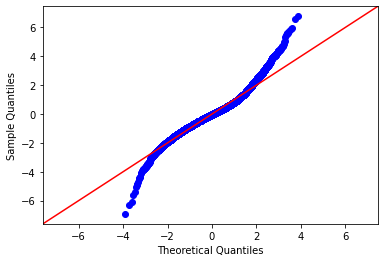

In [203]:
model_summary(df_iqr_zip, x_targs, 'price')

In [201]:
# Move this up with different iqr DF 
print('No Outlier Removal')
print('Min Home Price: {}'.format(df['price'].min()))
print('Max Home Price: {}'.format(df['price'].max()))
print('---------------- ')
print('Outlier Removal')
print('Min Home Price: {}'.format(df_iqr_zip['price'].min()))
print('Max Home Price: {}'.format(df_iqr_zip['price'].max()))

No Outlier Removal
Min Home Price: 78000.0
Max Home Price: 7700000.0
---------------- 
Outlier Removal
Min Home Price: 78000.0
Max Home Price: 1120000.0


In [70]:
sked_show(df_iqr_zip, x_targs)

NameError: name 'df_iqr_zip' is not defined